# Problem 1

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import seaborn as sns

In [3]:
sp=pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [4]:
sp.head(10)

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
1980-06-01       1377
1980-07-01       1966
1980-08-01       2453
1980-09-01       1984
1980-10-01       2596

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [6]:
sp.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [7]:
sp.isnull().sum()

Sparkling    0
dtype: int64

In [8]:
sp.shape

(187, 1)

In [9]:
rcParams['figure.figsize'] = 15,8

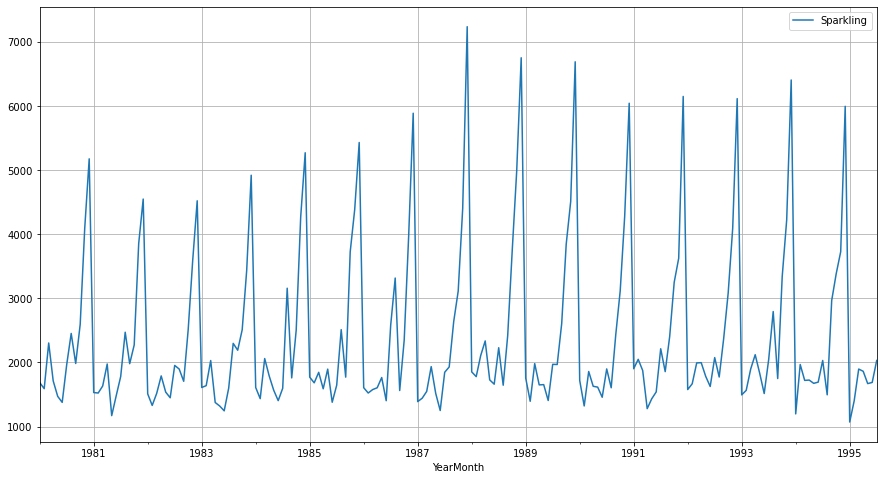

In [10]:
sp.plot(grid=True);

# Plot a year on year boxplot for Sparkling

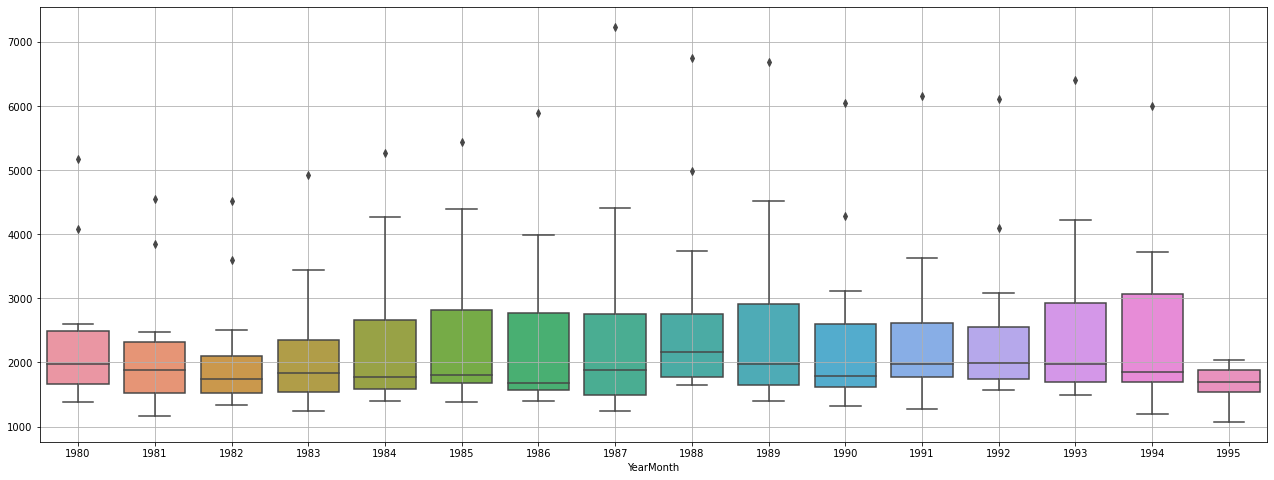

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sp.index.year,y = sp.values[:,0],ax=ax)
plt.grid();

# Plot a monthly boxplot for Sparkling taking all the years into account

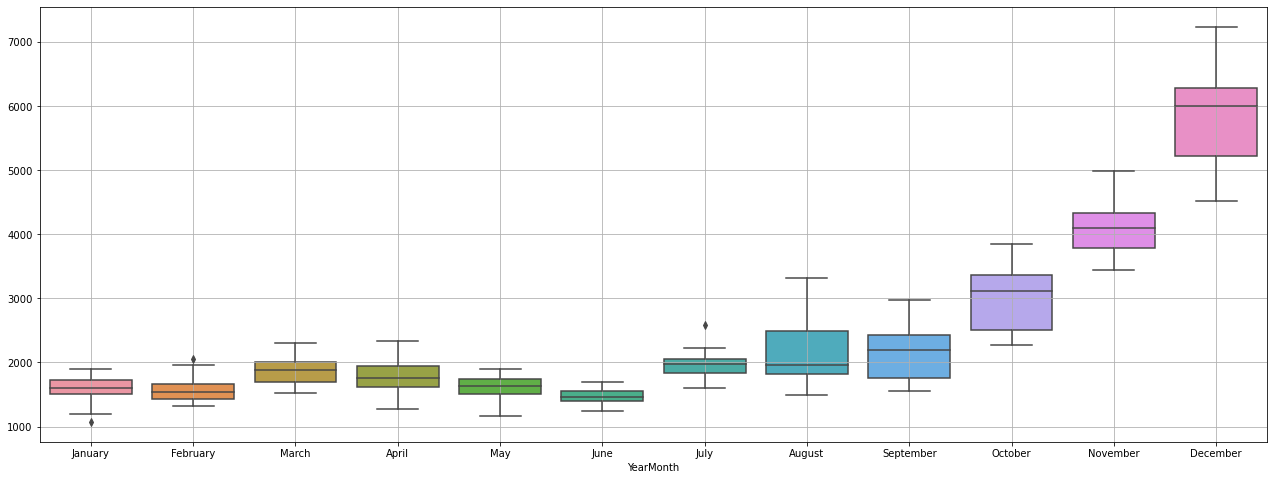

In [12]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sp.index.month_name(),y = sp.values[:,0],ax=ax)
plt.grid();

# Plot a monthplot of the give Time Series

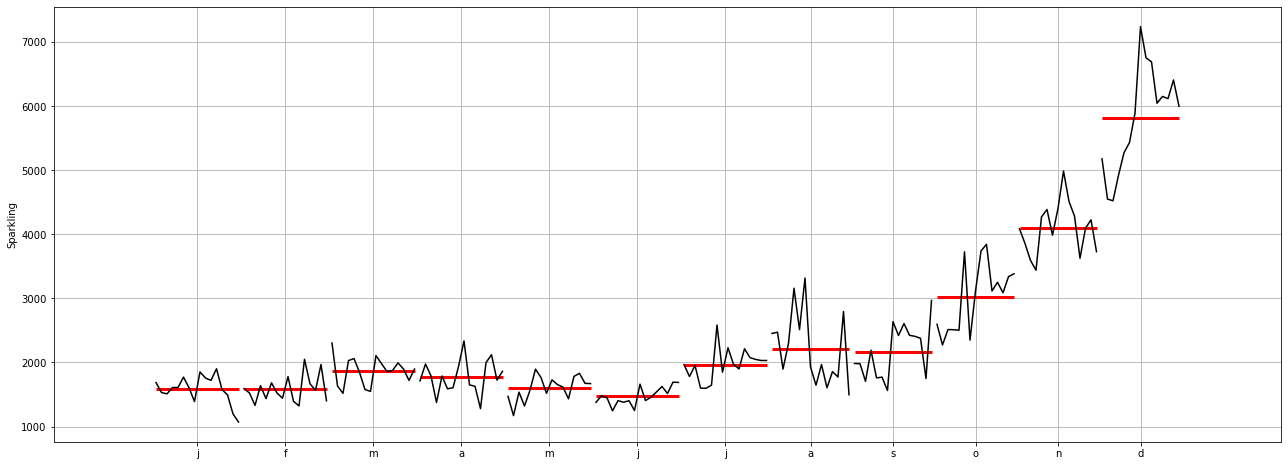

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(sp,ylabel='Sparkling',ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences

# Yearly Plot

In [14]:
sp_yearly_sum = sp.resample('A').sum()
sp_yearly_sum.head(20)

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431
1985-12-31      29640
1986-12-31      29170
1987-12-31      30258
1988-12-31      33246
1989-12-31      31443
1990-12-31      28977
1991-12-31      29587
1992-12-31      30171
1993-12-31      30991
1994-12-31      29584
1995-12-31      11620

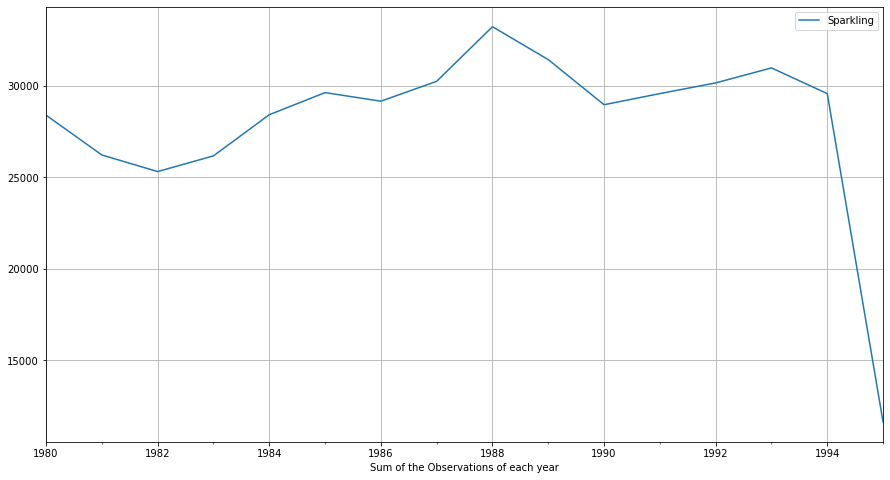

In [15]:
sp_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

# Monthly Plot

In [16]:
sp_monthly_sum = sp.resample('M').sum()
sp_monthly_sum.head(20)

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
1980-06-30       1377
1980-07-31       1966
1980-08-31       2453
1980-09-30       1984
1980-10-31       2596
1980-11-30       4087
1980-12-31       5179
1981-01-31       1530
1981-02-28       1523
1981-03-31       1633
1981-04-30       1976
1981-05-31       1170
1981-06-30       1480
1981-07-31       1781
1981-08-31       2472

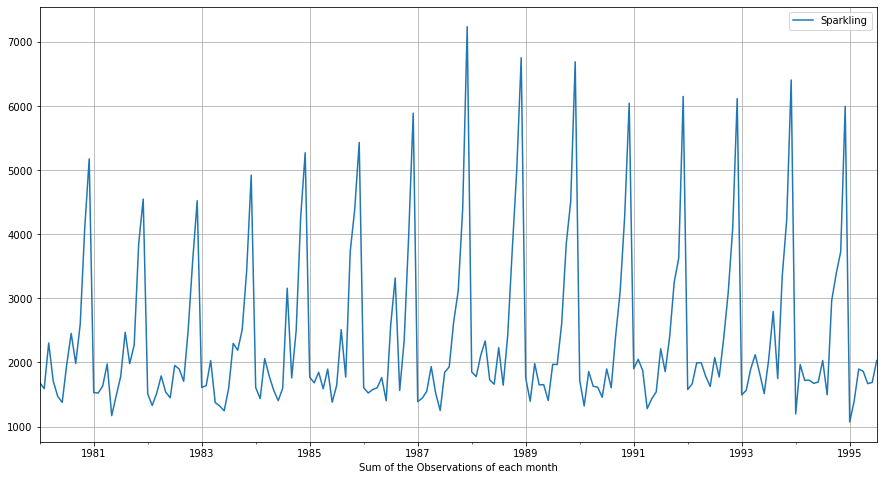

In [17]:
sp_monthly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each month');

# Quarterly Plot

In [18]:
sp_quarterly_sum = sp.resample('Q').sum()
sp_quarterly_sum.head(20)

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686
1981-06-30       4626
1981-09-30       6234
1981-12-31      10681
1982-03-31       4357
1982-06-30       4776
1982-09-30       5557
1982-12-31      10631
1983-03-31       5277
1983-06-30       3940
1983-09-30       6089
1983-12-31      10874
1984-03-31       5105
1984-06-30       4760
1984-09-30       6515
1984-12-31      12051

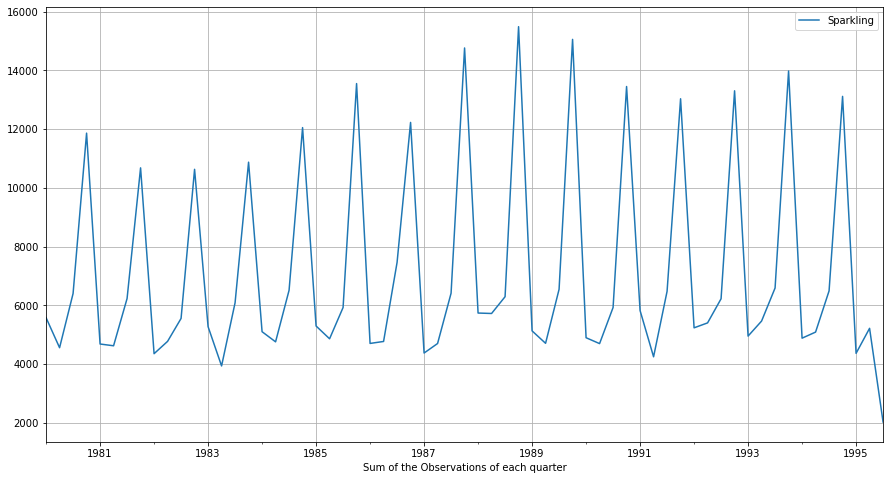

In [19]:
sp_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

# Plot the Time Series according to different months for different years

In [20]:
yearly_sales_across_months = pd.pivot_table(sp, values = 'Sparkling', columns = sp.index.month, 
                                        index = sp.index.year)

yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

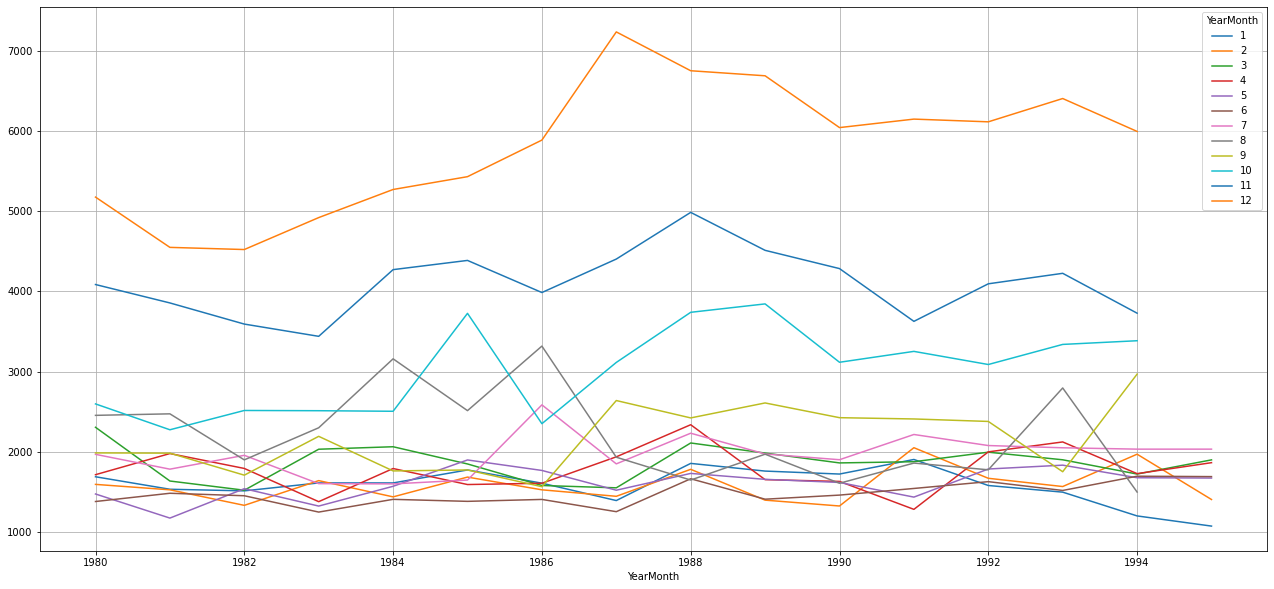

In [21]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Plot the Empirical Cumulative Distribution

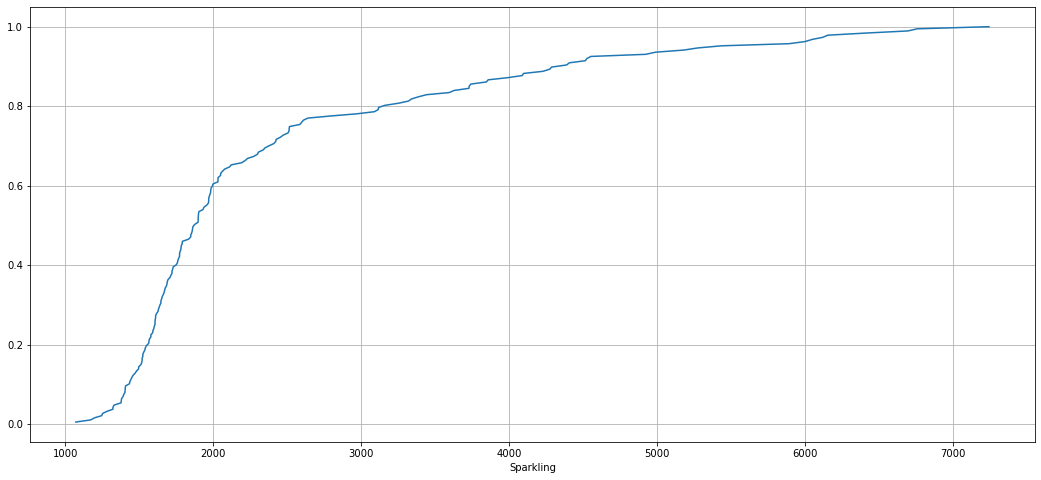

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(sp['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

# Plot the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

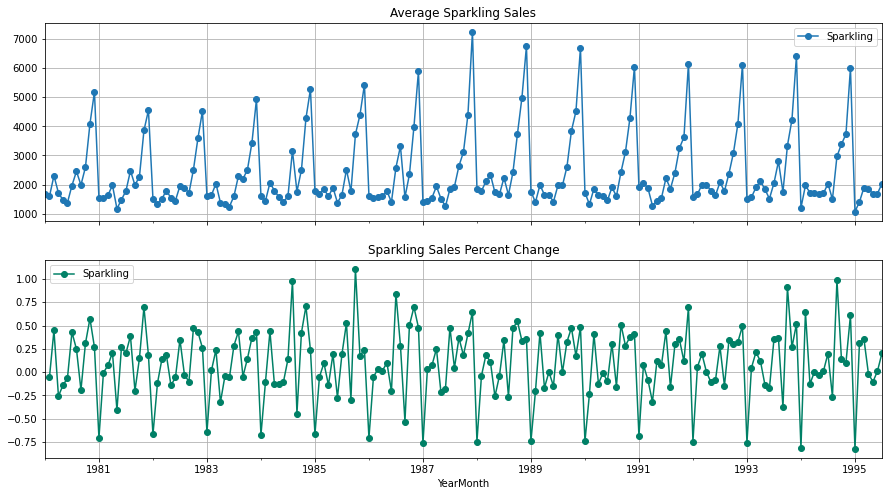

In [23]:
# group by date and get average Sparkling sales, and percent change
average    = sp.groupby(sp.index)["Sparkling"].mean()
pct_change =sp.groupby(sp.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot percent change for Sparkling Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

#  Decompose the Time Series

## Additive Model

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

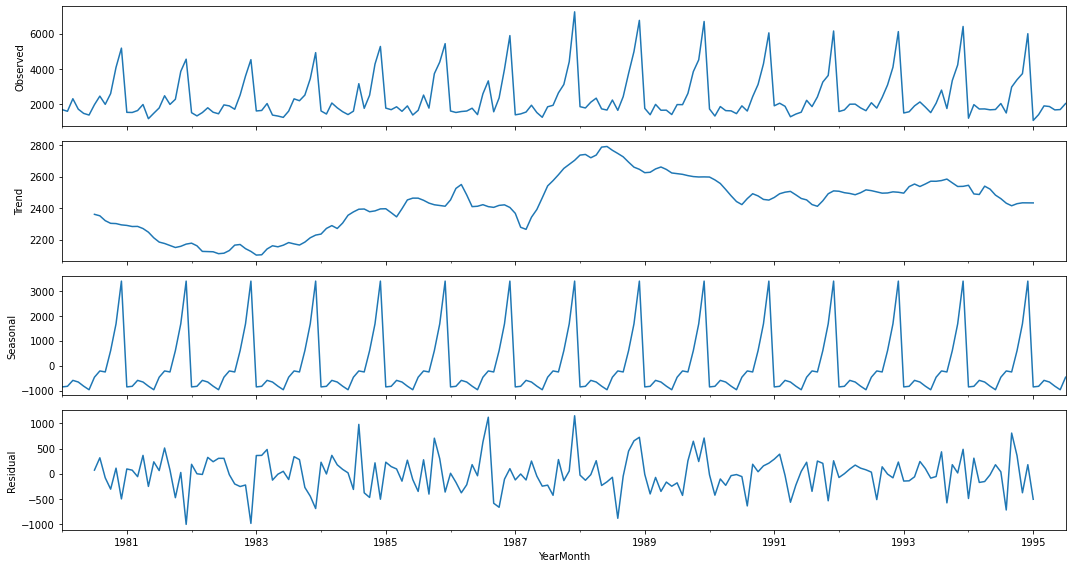

In [25]:
decomposition = seasonal_decompose(sp,model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [27]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
               Sparkling
YearMonth              
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01  2360.666667
1980-08-01  2351.333333
1980-09-01  2320.541667
1980-10-01  2303.583333
1980-11-01  2302.041667
1980-12-01  2293.791667 

Seasonality 
               Sparkling
YearMonth              
1980-01-01  -854.260599
1980-02-01  -830.350678
1980-03-01  -592.356630
1980-04-01  -658.490559
1980-05-01  -824.416154
1980-06-01  -967.434011
1980-07-01  -465.502265
1980-08-01  -214.332821
1980-09-01  -254.677265
1980-10-01   599.769957
1980-11-01  1675.067179
1980-12-01  3386.983846 

Residual 
              Sparkling
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01   70.835599
1980-08-01  315.999487
1980-09-01  -81.864401
1980-10-01 -307.353290
1980-11-01  109

## Multiplicative Model

In [28]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

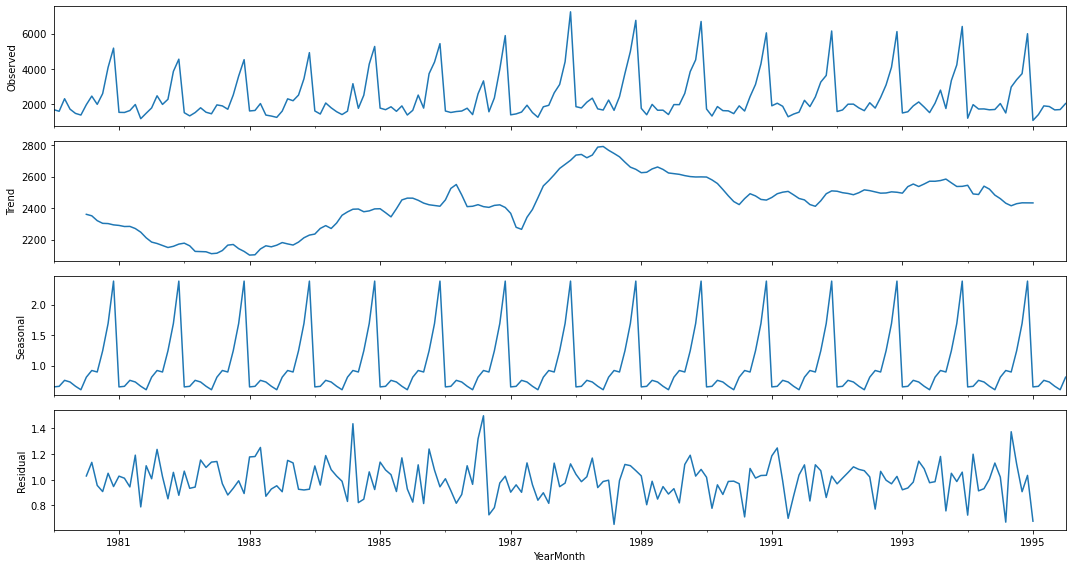

In [29]:
decomposition = seasonal_decompose(sp,model='multiplicative')
decomposition.plot();

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [31]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
               Sparkling
YearMonth              
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01  2360.666667
1980-08-01  2351.333333
1980-09-01  2320.541667
1980-10-01  2303.583333
1980-11-01  2302.041667
1980-12-01  2293.791667 

Seasonality 
             Sparkling
YearMonth            
1980-01-01   0.649843
1980-02-01   0.659214
1980-03-01   0.757440
1980-04-01   0.730351
1980-05-01   0.660609
1980-06-01   0.603468
1980-07-01   0.809164
1980-08-01   0.918822
1980-09-01   0.894367
1980-10-01   1.241789
1980-11-01   1.690158
1980-12-01   2.384776 

Residual 
             Sparkling
YearMonth            
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01   1.029230
1980-08-01   1.135407
1980-09-01   0.955954
1980-10-01   0.907513
1980-11-01   1.050423
1980-12-01   0.946770 



# Train Test Split

In [32]:
train             = sp[sp.index<'1991'] 
test              = sp[sp.index>='1991']

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [34]:
print('Shape of Training Data')
display(train.shape)
print('Shape of Test Data')
display(test.shape)

Shape of Training Data


(132, 1)

Shape of Test Data


(55, 1)

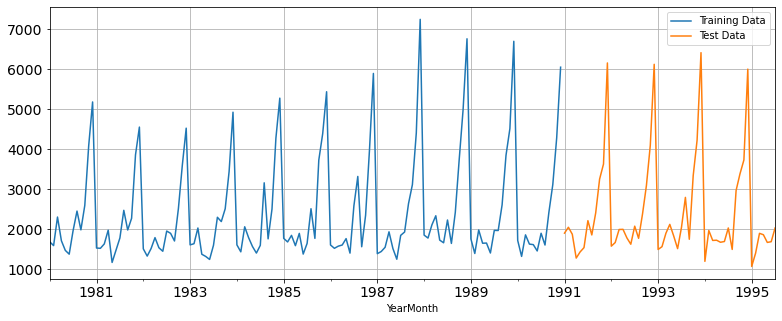

In [35]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Linear Regression

In [36]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

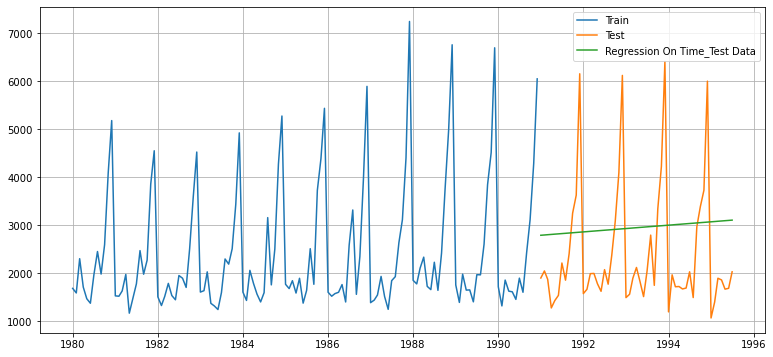

In [42]:
    test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [43]:
from sklearn import metrics

In [44]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

# Naive

In [46]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [47]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

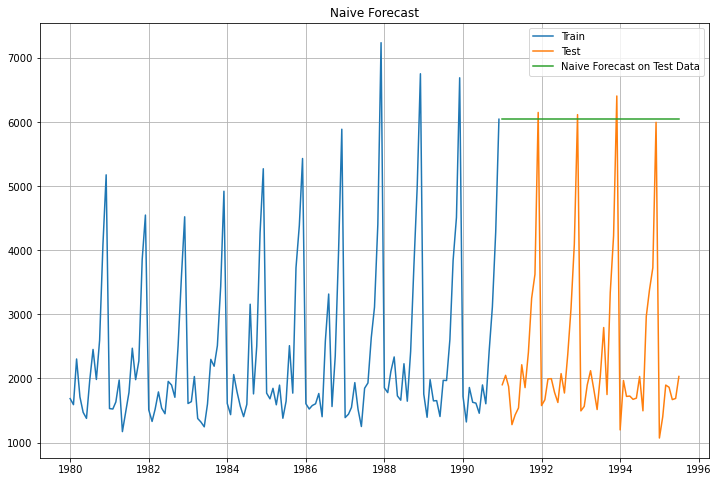

In [48]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [49]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [50]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

# Simple Average

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

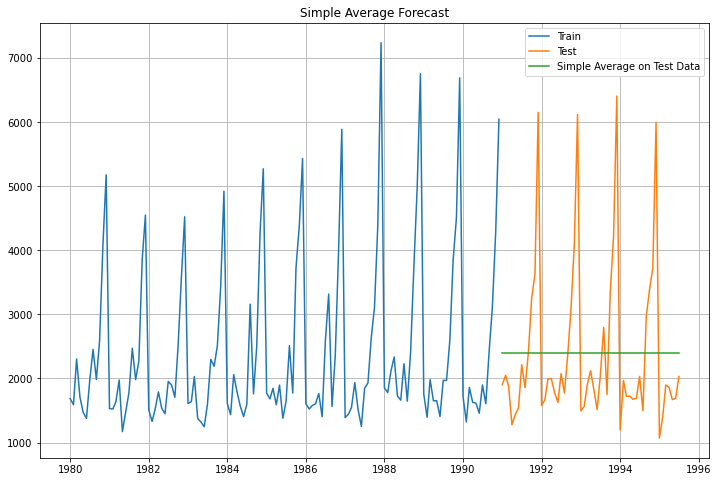

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [54]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

# Moving Average

In [56]:
MovingAverage = sp.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [57]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

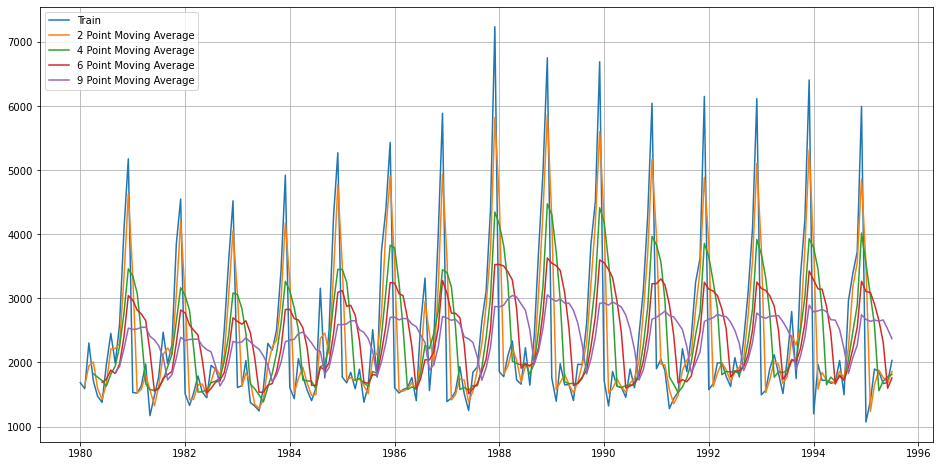

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [59]:
#Creating train and test set 
train             = sp[sp.index<'1991'] 
test              = sp[sp.index>='1991']

trailing_MovingAverage_train=MovingAverage[sp.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[sp.index>='1991']
# trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
# trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

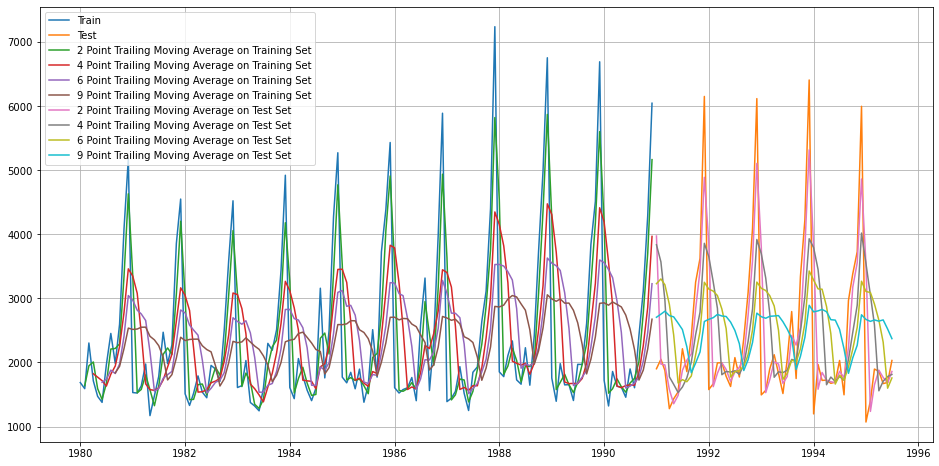

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [61]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 


In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

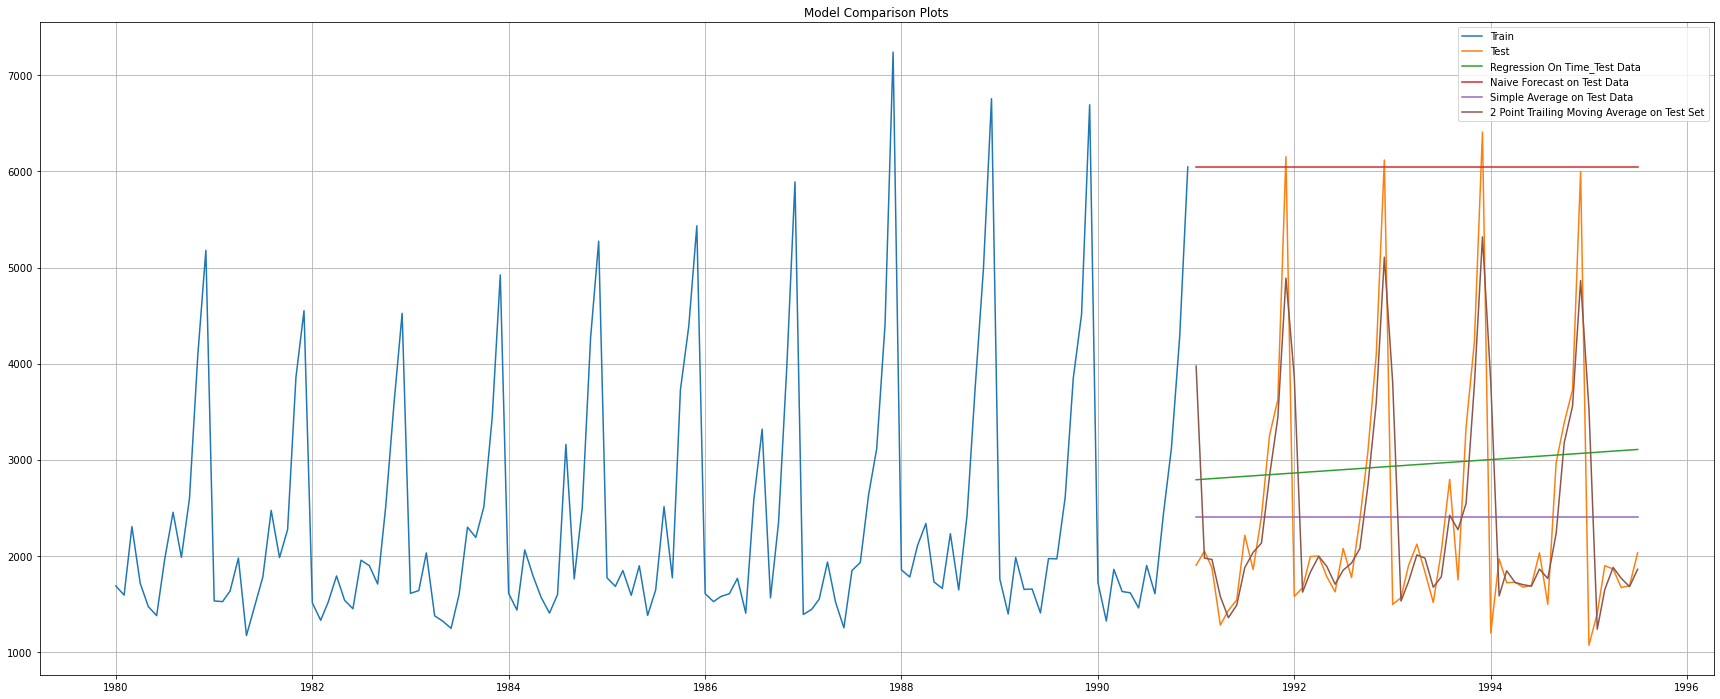

In [63]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Simple Exponential Smoothing

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

In [68]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test

Sparkling     predict
YearMonth                        
1991-01-01       1902  2403.78287
1991-02-01       2049  2403.78287
1991-03-01       1874  2403.78287
1991-04-01       1279  2403.78287
1991-05-01       1432  2403.78287
1991-06-01       1540  2403.78287
1991-07-01       2214  2403.78287
1991-08-01       1857  2403.78287
1991-09-01       2408  2403.78287
1991-10-01       3252  2403.78287
1991-11-01       3627  2403.78287
1991-12-01       6153  2403.78287
1992-01-01       1577  2403.78287
1992-02-01       1667  2403.78287
1992-03-01       1993  2403.78287
1992-04-01       1997  2403.78287
1992-05-01       1783  2403.78287
1992-06-01       1625  2403.78287
1992-07-01       2076  2403.78287
1992-08-01       1773  2403.78287
1992-09-01       2377  2403.78287
1992-10-01       3088  2403.78287
1992-11-01       4096  2403.78287
1992-12-01       6119  2403.78287
1993-01-01       1494  2403.78287
1993-02-01       1564  2403.78287
1993-03-01       1898  2403.78287
1993-04-01       2121  2403.78287
1993-05-01       1831  2403.78287
1993-06-01       1515  2403.78287
1993-07-01       2048  2403.78287
1993-08-01       2795  2403.78287
1993-09-01       1749  2403.78287
1993-10-01       3339  2403.78287
1993-11-01       4227  2403.78287
1993-12-01       6410  2403.78287
1994-01-01       1197  2403.78287
1994-02-01       1968  2403.78287
1994-03-01       1720  2403.78287
1994-04-01       1725  2403.78287
1994-05-01       1674  2403.78287
1994-06-01       1693  2403.78287
1994-07-01       2031  2403.78287
1994-08-01       1495  2403.78287
1994-09-01       2968  2403.78287
1994-10-01       3385  2403.78287
1994-11-01       3729  2403.78287
1994-12-01       5999  2403.78287
1995-01-01       1070  2403.78287
1995-02-01       1402  2403.78287
1995-03-01       1897  2403.78287
1995-04-01       1862  2403.78287
1995-05-01       1670  2403.78287
1995-06-01       1688  2403.78287
1995-07-01       2031  2403.78287

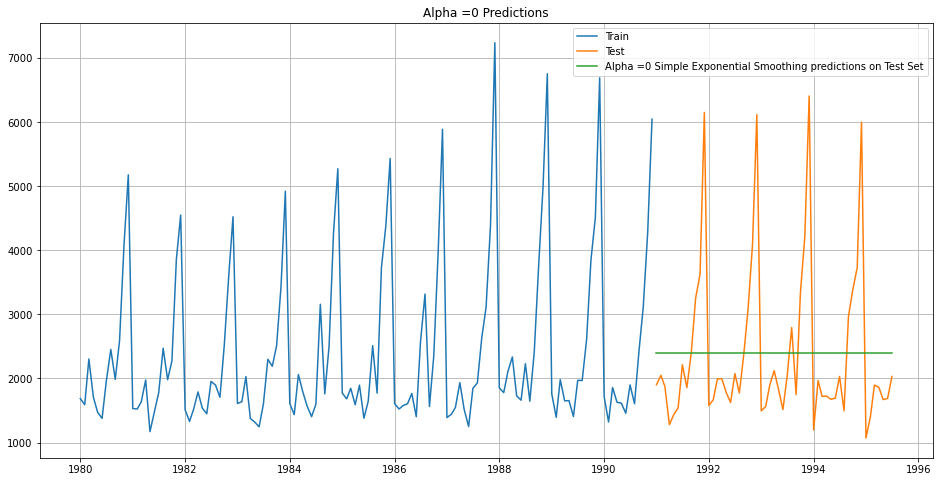

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

In [71]:
SES_test.isnull().sum()

Sparkling    0
predict      0
dtype: int64

In [72]:
SES_test.tail(10)

Sparkling     predict
YearMonth                        
1994-10-01       3385  2403.78287
1994-11-01       3729  2403.78287
1994-12-01       5999  2403.78287
1995-01-01       1070  2403.78287
1995-02-01       1402  2403.78287
1995-03-01       1897  2403.78287
1995-04-01       1862  2403.78287
1995-05-01       1670  2403.78287
1995-06-01       1688  2403.78287
1995-07-01       2031  2403.78287

In [73]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha 0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha 0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [74]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                    1389.135175
NaiveModel                          3864.279352
SimpleAverageModel                  1275.081804
2pointTrailingMovingAverage          813.400684
4pointTrailingMovingAverage         1156.589694
6pointTrailingMovingAverage         1283.927428
9pointTrailingMovingAverage         1346.278315
Alpha=0,SimpleExponentialSmoothing  1275.081813

In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [76]:
SES_test.isnull().sum()

Sparkling    0
predict      0
dtype: int64

In [77]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [78]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

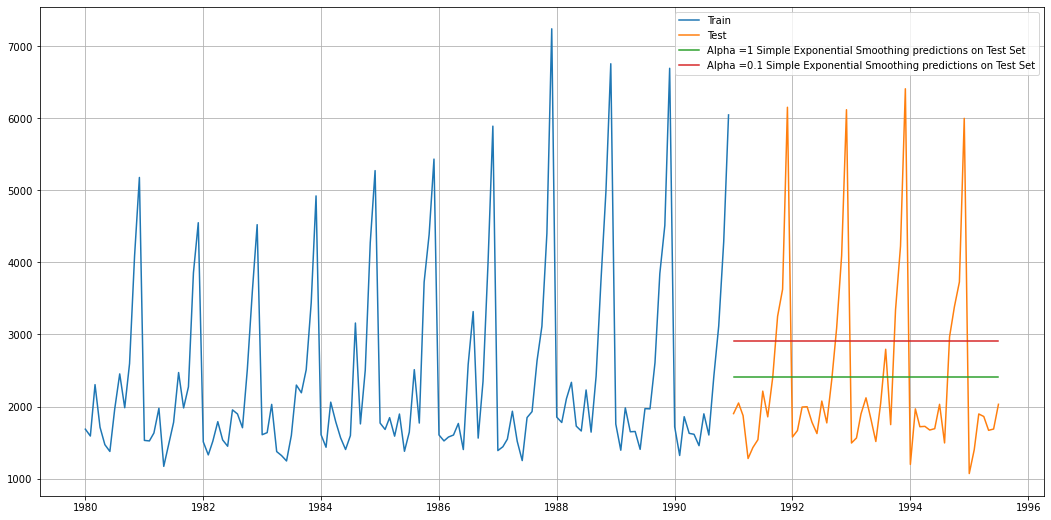

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [80]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                      1389.135175
NaiveModel                            3864.279352
SimpleAverageModel                    1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Alpha=0,SimpleExponentialSmoothing    1275.081813
Alpha=0.1,SimpleExponentialSmoothing  1375.393398

# Double Exponential Smoothing

In [81]:
DES_train = train.copy()
DES_test = test.copy()

In [82]:
model_DES = Holt(DES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [83]:
model_DES_autofit = model_DES.fit(optimized=True)

In [84]:
model_DES_autofit.params

{'smoothing_level': 0.6478144580517214,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0825794906987,
 'initial_slope': 27.05013613663255,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test

Sparkling      predict
YearMonth                         
1991-01-01       1902  5281.489091
1991-02-01       2049  5308.539227
1991-03-01       1874  5335.589363
1991-04-01       1279  5362.639499
1991-05-01       1432  5389.689635
1991-06-01       1540  5416.739771
1991-07-01       2214  5443.789907
1991-08-01       1857  5470.840044
1991-09-01       2408  5497.890180
1991-10-01       3252  5524.940316
1991-11-01       3627  5551.990452
1991-12-01       6153  5579.040588
1992-01-01       1577  5606.090724
1992-02-01       1667  5633.140860
1992-03-01       1993  5660.190996
1992-04-01       1997  5687.241133
1992-05-01       1783  5714.291269
1992-06-01       1625  5741.341405
1992-07-01       2076  5768.391541
1992-08-01       1773  5795.441677
1992-09-01       2377  5822.491813
1992-10-01       3088  5849.541949
1992-11-01       4096  5876.592086
1992-12-01       6119  5903.642222
1993-01-01       1494  5930.692358
1993-02-01       1564  5957.742494
1993-03-01       1898  5984.792630
1993-04-01       2121  6011.842766
1993-05-01       1831  6038.892902
1993-06-01       1515  6065.943039
1993-07-01       2048  6092.993175
1993-08-01       2795  6120.043311
1993-09-01       1749  6147.093447
1993-10-01       3339  6174.143583
1993-11-01       4227  6201.193719
1993-12-01       6410  6228.243855
1994-01-01       1197  6255.293991
1994-02-01       1968  6282.344128
1994-03-01       1720  6309.394264
1994-04-01       1725  6336.444400
1994-05-01       1674  6363.494536
1994-06-01       1693  6390.544672
1994-07-01       2031  6417.594808
1994-08-01       1495  6444.644944
1994-09-01       2968  6471.695081
1994-10-01       3385  6498.745217
1994-11-01       3729  6525.795353
1994-12-01       5999  6552.845489
1995-01-01       1070  6579.895625
1995-02-01       1402  6606.945761
1995-03-01       1897  6633.995897
1995-04-01       1862  6661.046034
1995-05-01       1670  6688.096170
1995-06-01       1688  6715.146306
1995-07-01       2031  6742.196442

In [86]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha=0.6478144580517214,Beta=0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha=0.6478144580517214,Beta=0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 3850.780


In [87]:
#### First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [88]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [89]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [90]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

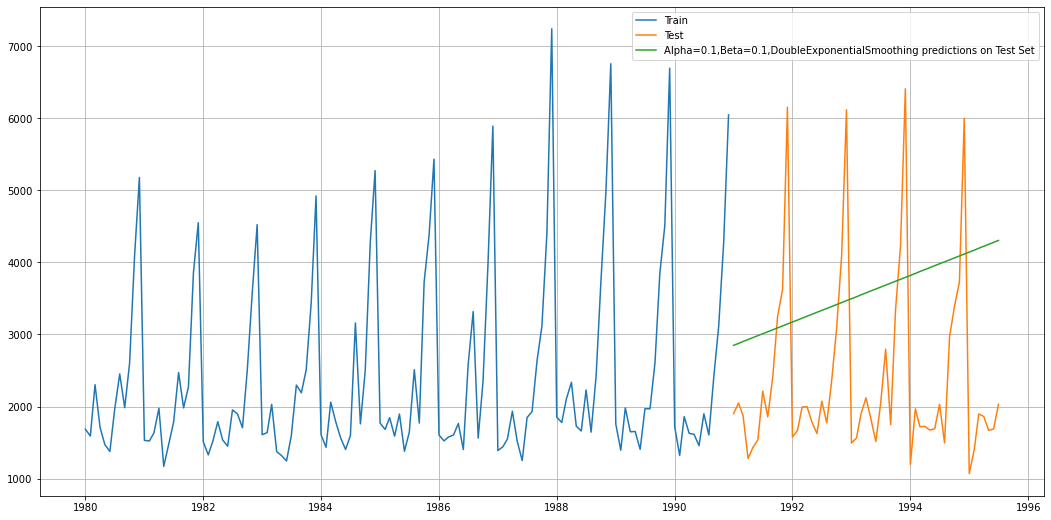

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [92]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0,SimpleExponentialSmoothing             1275.081813
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

# Triple Exponential Smoothing

In [93]:
TES_train = train.copy()
TES_test = test.copy()

In [94]:
# model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [95]:
model_TES_autofit = model_TES.fit(optimized=True)

In [96]:
model_TES_autofit.params

{'smoothing_level': 0.1544162761359136,
 'smoothing_slope': 5.857005890124909e-28,
 'smoothing_seasonal': 0.37117735419413195,
 'damping_slope': nan,
 'initial_level': 1639.9993369454512,
 'initial_slope': 4.882555522774917,
 'initial_seasons': array([1.0084364 , 0.96901972, 1.24175616, 1.13207931, 0.93986561,
        0.93815268, 1.22455844, 1.54419681, 1.27335562, 1.63195715,
        2.48263448, 3.11827569]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.tail()

Sparkling  auto_predict
YearMonth                          
1995-03-01       1897   2050.957709
1995-04-01       1862   1933.675867
1995-05-01       1670   1817.160381
1995-06-01       1688   1604.702111
1995-07-01       2031   2204.182308

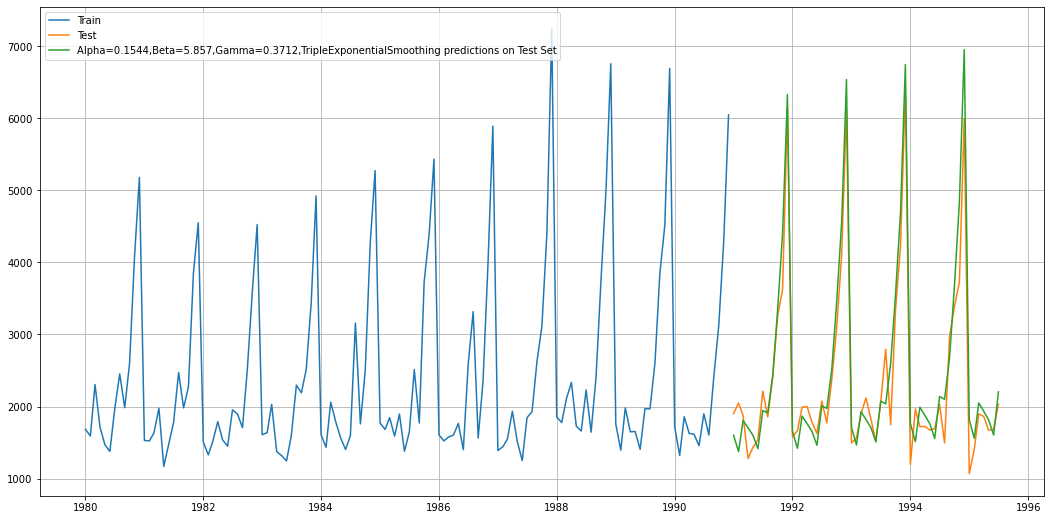

In [98]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1544,Beta=5.857,Gamma=0.3712,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [99]:
## Test Data
## Yet to do
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.1544,Beta=5.857,Gamma=0.3712, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1544,Beta=5.857,Gamma=0.3712, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 384.143


In [100]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1544,Beta=5.857,Gamma=0.3712,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0,SimpleExponentialSmoothing                  1275.081813
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.1544,Beta=5.857,Gamma=0.3712,TripleExpo...   384.142818

In [101]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [102]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [103]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.1          0.1           0.1     388.351959  5.799963e+02
1             0.1          0.1           0.2     372.002250  6.174690e+02
2             0.1          0.1           0.3     364.222099  6.387802e+02
3             0.1          0.1           0.4     362.590749  6.447620e+02
4             0.1          0.1           0.5     365.655545  6.411226e+02
..            ...          ...           ...            ...           ...
995           1.0          1.0           0.6  153394.791827  7.989790e+05
996           1.0          1.0           0.7   94040.964957  1.074413e+06
997           1.0          1.0           0.8  102196.953755  5.010607e+06
998           1.0          1.0           0.9   77924.294413  4.318265e+05
999           1.0          1.0           1.0  239917.432848  1.254280e+05

[1000 rows x 5 columns]

In [104]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  389.772245  336.715250
211           0.3          0.2           0.2  395.529174  350.145204
110           0.2          0.2           0.1  405.333164  352.571689
200           0.3          0.1           0.1  394.630053  352.607849
20            0.1          0.3           0.1  414.423963  354.534561

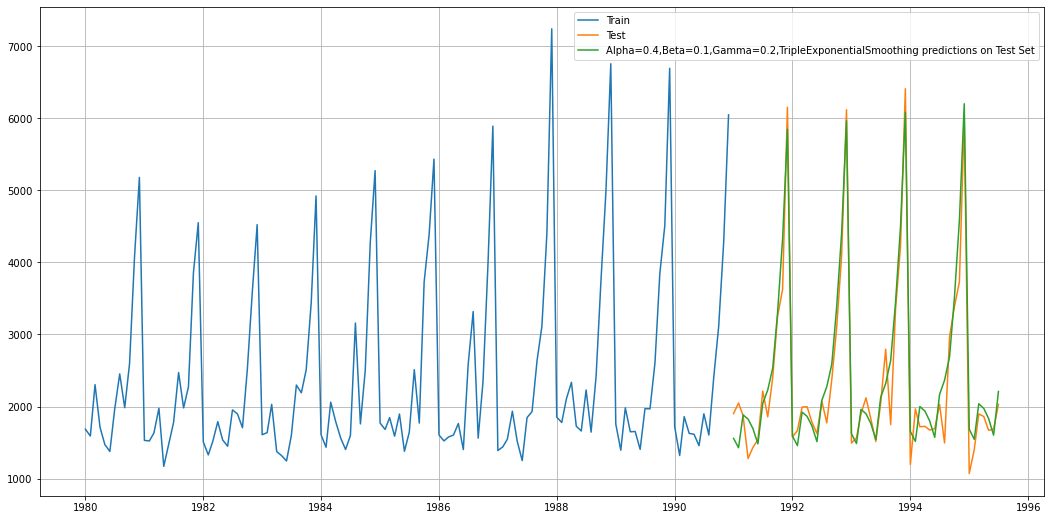

In [105]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [106]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0,SimpleExponentialSmoothing                  1275.081813
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.1544,Beta=5.857,Gamma=0.3712,TripleExpo...   384.142818
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250

In [107]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
Alpha=0.1544,Beta=5.857,Gamma=0.3712,TripleExpo...   384.142818
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0,SimpleExponentialSmoothing                  1275.081813
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

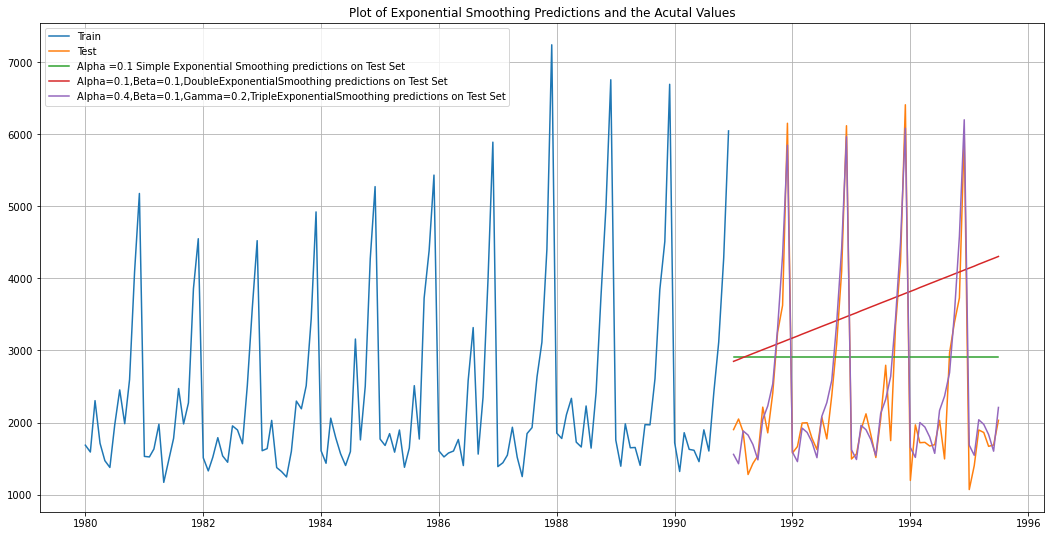

In [108]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [109]:
fullmodel1 = ExponentialSmoothing(sp,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1544,
                                                                 smoothing_slope=5.857,
                                                                 smoothing_seasonal=0.3712)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [110]:
RMSE_fullmodel1 = metrics.mean_squared_error(sp['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 118058.3223193238


In [111]:
fullmodel2 = ExponentialSmoothing(sp,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_slope=0.1,
                                                                 smoothing_seasonal=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [112]:
RMSE_fullmodel2 = metrics.mean_squared_error(sp['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 376.8211824384389


In [113]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

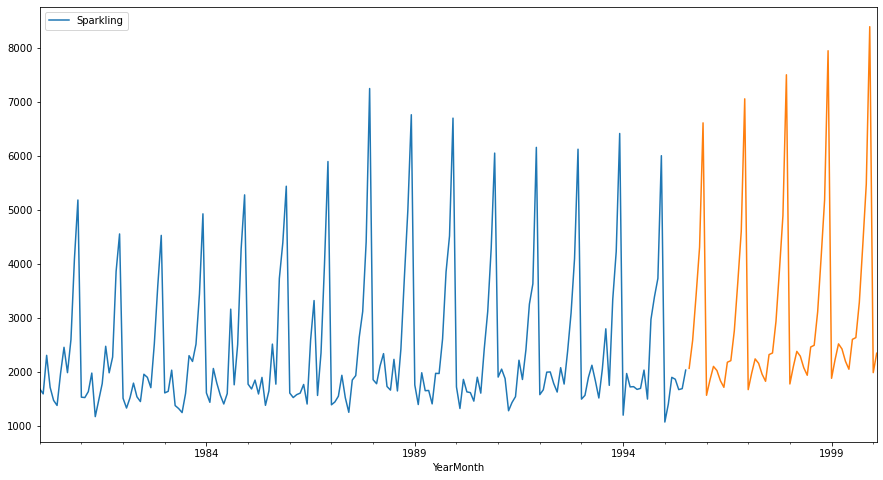

In [114]:
sp.plot()
prediction_2.plot();

# Check Stationarity of data

In [115]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

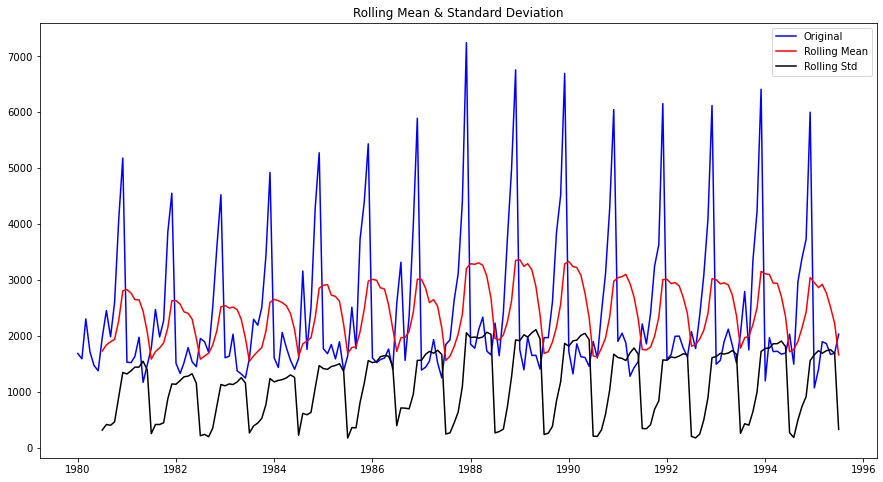

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [116]:
test_stationarity(sp['Sparkling'])

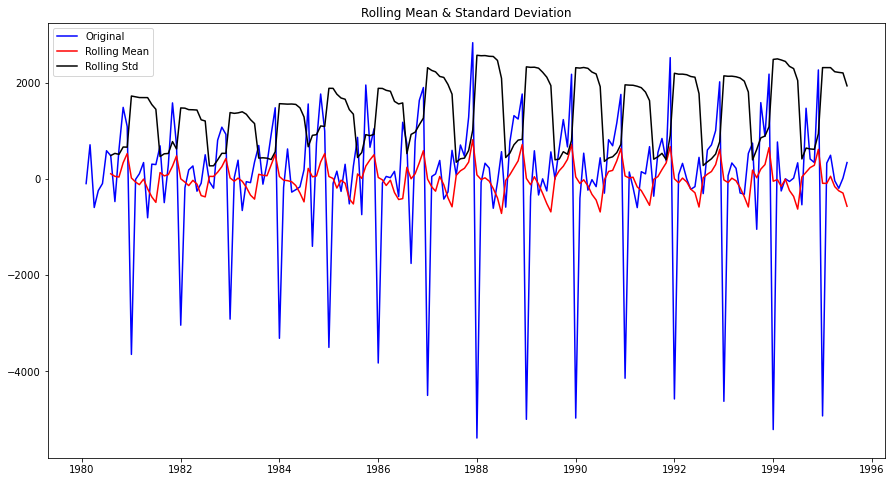

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [117]:
test_stationarity(sp['Sparkling'].diff().dropna())

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

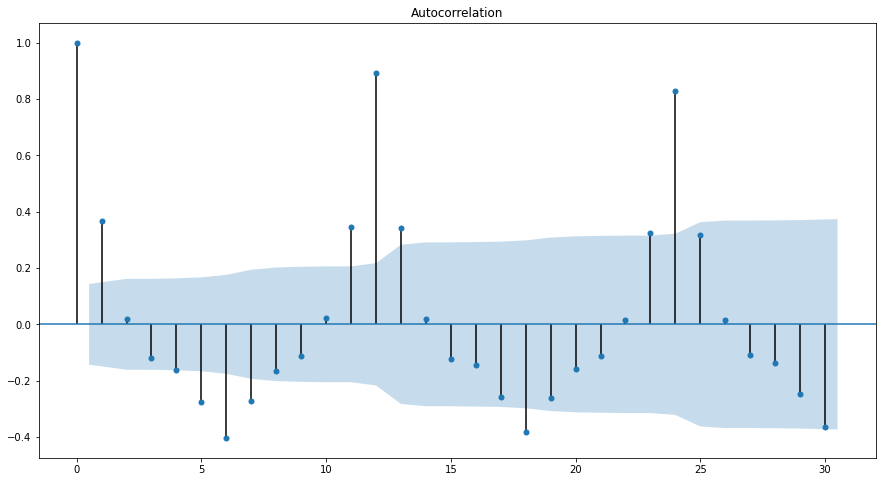

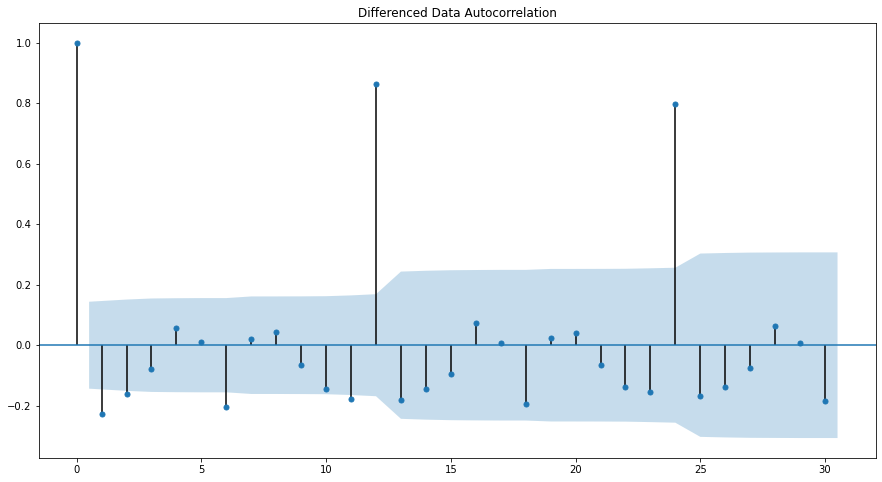

In [119]:
plot_acf(sp['Sparkling'],lags=30)
plot_acf(sp['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

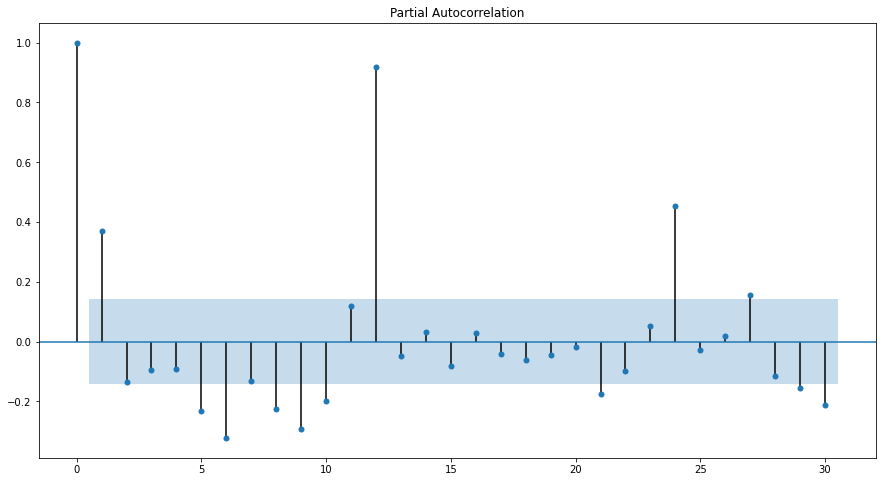

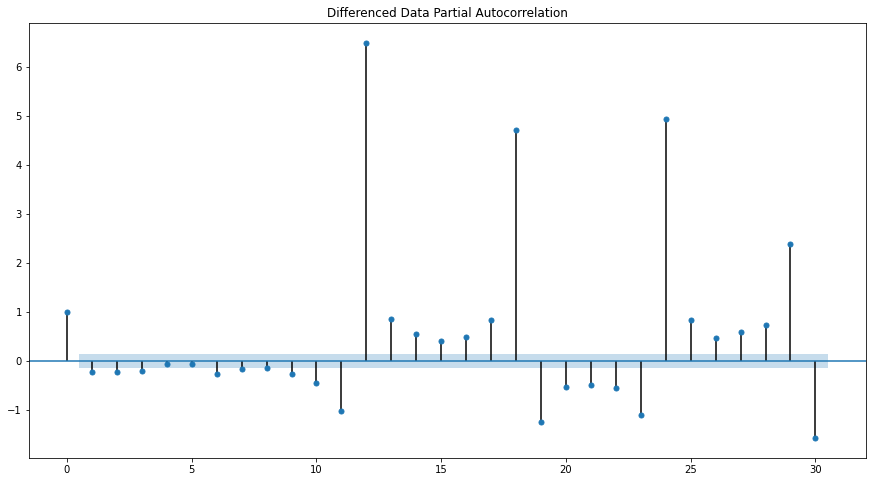

In [120]:
plot_pacf(sp['Sparkling'],lags=30)
plot_pacf(sp['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

In [121]:
## This is to display multiple data frames from one cell
from IPython.display import display

# ARIMA

In [122]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)


In [123]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [124]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643899768
ARIMA(0, 1, 2) - AIC:2232.783097684203
ARIMA(1, 1, 0) - AIC:2268.5280606030537
ARIMA(1, 1, 1) - AIC:2235.0139453494685
ARIMA(1, 1, 2) - AIC:2233.597647118906
ARIMA(2, 1, 0) - AIC:2262.035600147697
ARIMA(2, 1, 1) - AIC:2232.360489909205


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 2) - AIC:2210.6199857507927
ARIMA(3, 1, 0) - AIC:2259.4715547784995
ARIMA(3, 1, 1) - AIC:2233.9217591552692
ARIMA(3, 1, 2) - AIC:2228.927448127224


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8   (2, 1, 2)  2210.619986
11  (3, 1, 2)  2228.927448
7   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
5   (1, 1, 2)  2233.597647
10  (3, 1, 1)  2233.921759
4   (1, 1, 1)  2235.013945
9   (3, 1, 0)  2259.471555
6   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
3   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [126]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1012.884
Date:                Wed, 09 Dec 2020   AIC                           2210.620
Time:                        23:02:24   BIC                           2227.871
Sample:                    02-01-1980   HQIC                          2217.630
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.800      0.000       4.572       6.599
ar.L1.D.Sparkling     1.2699      0.075     17.045      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [127]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [128]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.521232002091


In [129]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_ARIMA(2,1,2)'])

resultsDf

RMSE
Auto_ARIMA(2,1,2)  1374.521232

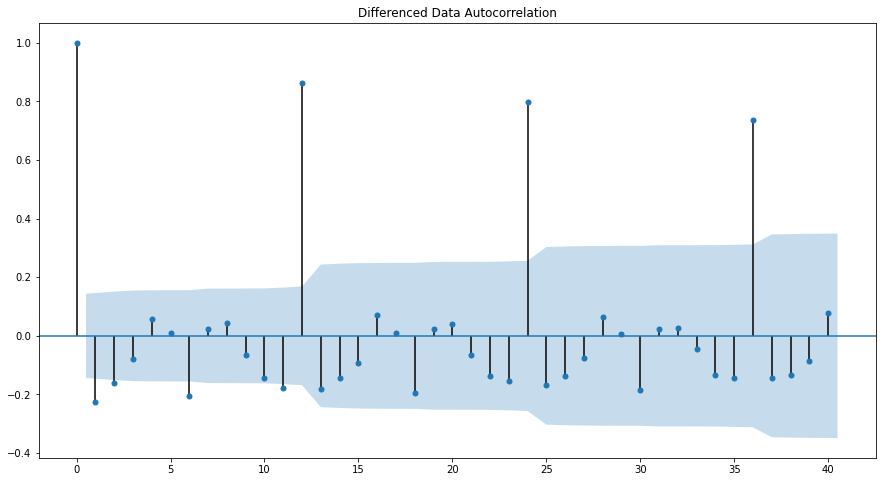

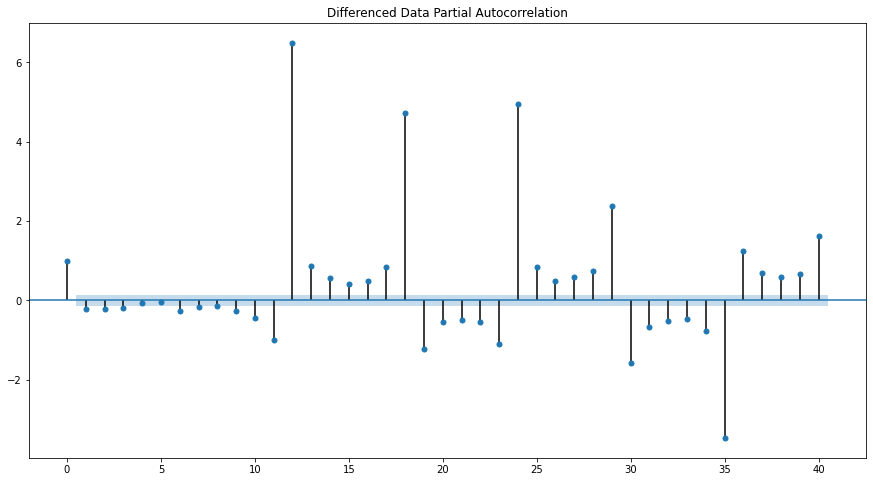

In [130]:
plot_acf(sp['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(sp['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show()

In [131]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.120
Date:                Wed, 09 Dec 2020   AIC                           2228.927
Time:                        23:02:25   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9844      3.643      1.643      0.103      -1.156      13.125
ar.L1.D.Sparkling    -0.4420   5.81e-06  -7.61e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [132]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [133]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1378.9755988059887


In [134]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual_ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)    1374.521232
Manual_ARIMA(3,1,2)  1378.975599

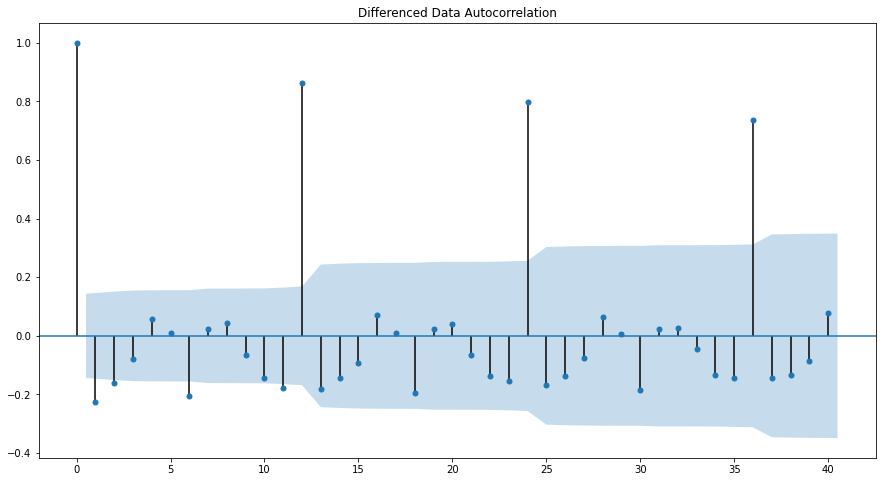

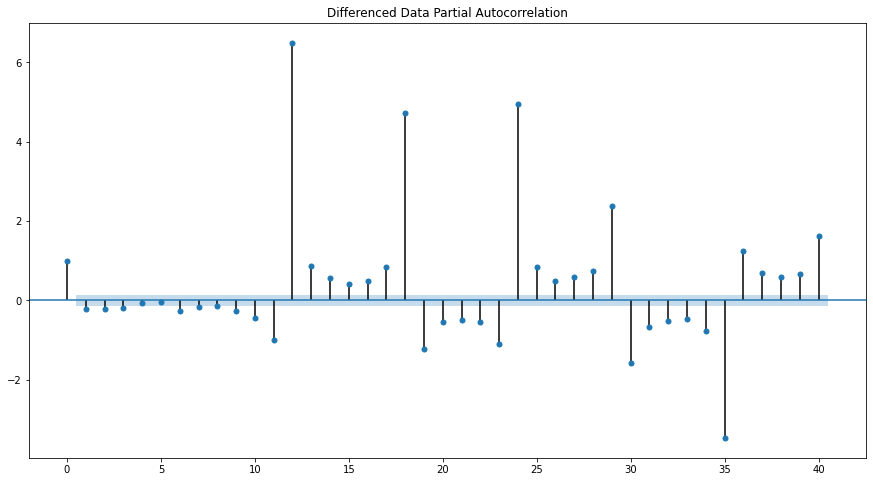

In [135]:
plot_acf(sp['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(sp['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show()

# SARIMA

# Without Seasonal Differencing

In [136]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)


In [137]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [138]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846595
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640238347
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389758
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791546
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158604697
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920767
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625747
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064855
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566498
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957291278
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838918
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319378907
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144336137
SARIMA(0, 1, 

In [139]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
129  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
142  (3, 1, 2)  (3, 0, 1, 12)  1388.602198
130  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
131  (3, 1, 1)  (3, 0, 2, 12)  1389.195898
143  (3, 1, 2)  (3, 0, 2, 12)  1389.702001

In [140]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, 0, 12)   Log Likelihood                -685.894
Date:                            Wed, 09 Dec 2020   AIC                           1387.788
Time:                                    23:11:48   BIC                           1407.963
Sample:                                         0   HQIC                          1395.931
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      0.150   

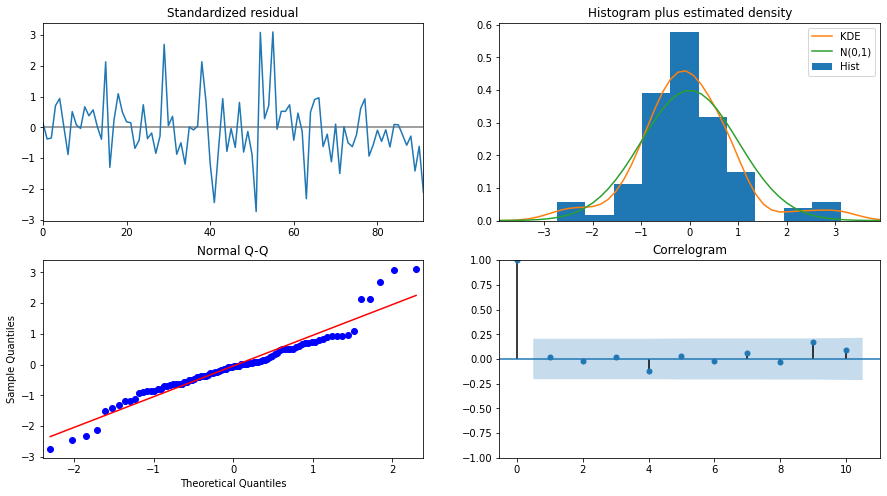

In [141]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [142]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [143]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1389.352595  415.861229     574.279563    2204.425627
1  1224.664820  427.865336     386.064171    2063.265470
2  1673.331184  428.009901     834.447194    2512.215175
3  1533.303338  432.773679     685.082513    2381.524162
4  1425.948504  435.887488     571.624727    2280.272281

In [144]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

601.2450875352879


In [145]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_SARIMA_WOSD(3,1,1)(3,0,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)                  1374.521232
Manual_ARIMA(3,1,2)                1378.975599
Auto_SARIMA_WOSD(3,1,1)(3,0,0,12)   601.245088

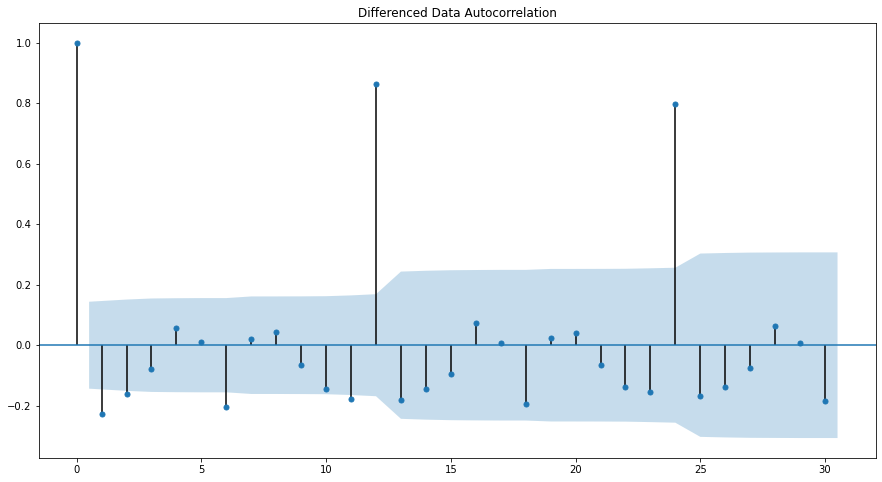

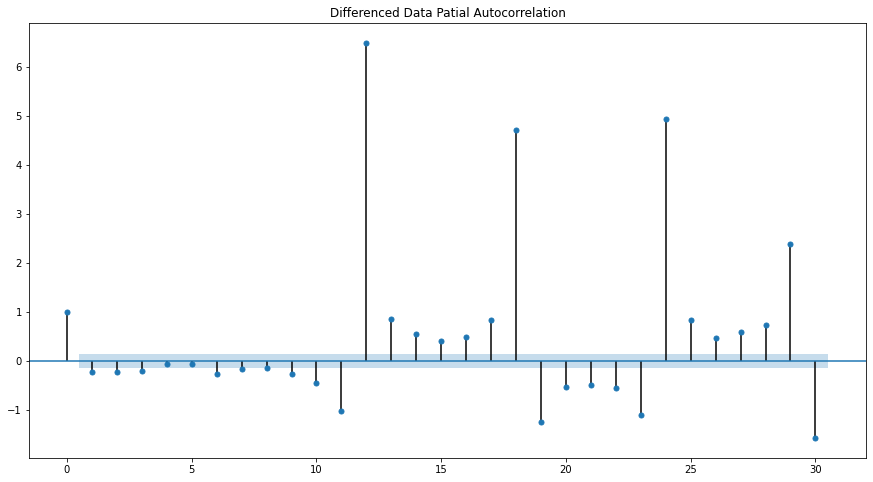

In [146]:
plot_acf(sp['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(sp['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Patial Autocorrelation')
plt.show()

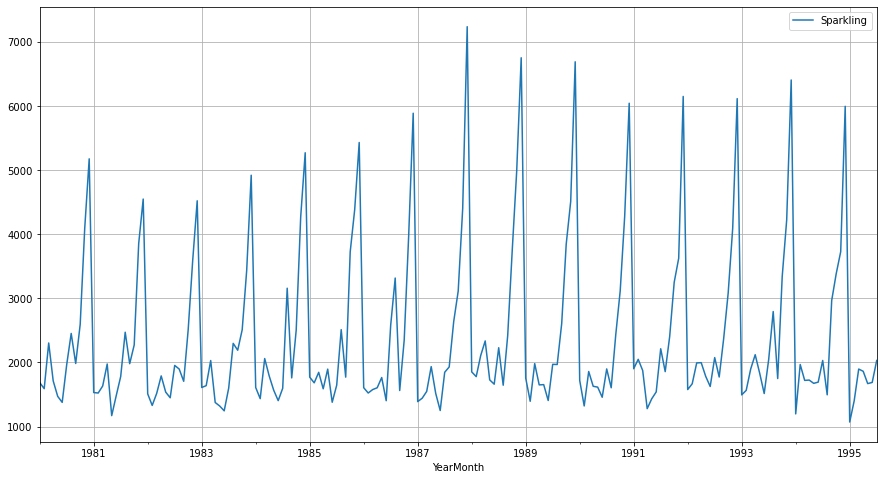

In [147]:
sp.plot()
plt.grid();

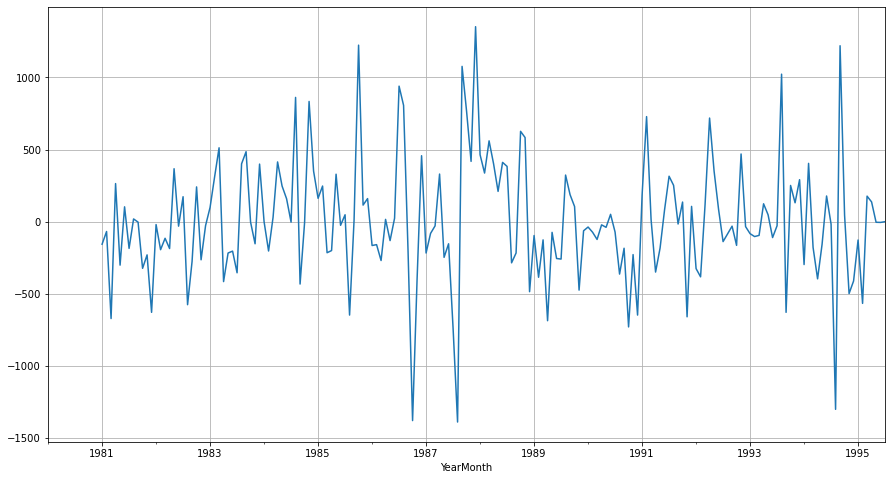

In [148]:
(sp['Sparkling'].diff(12)).plot()
plt.grid();

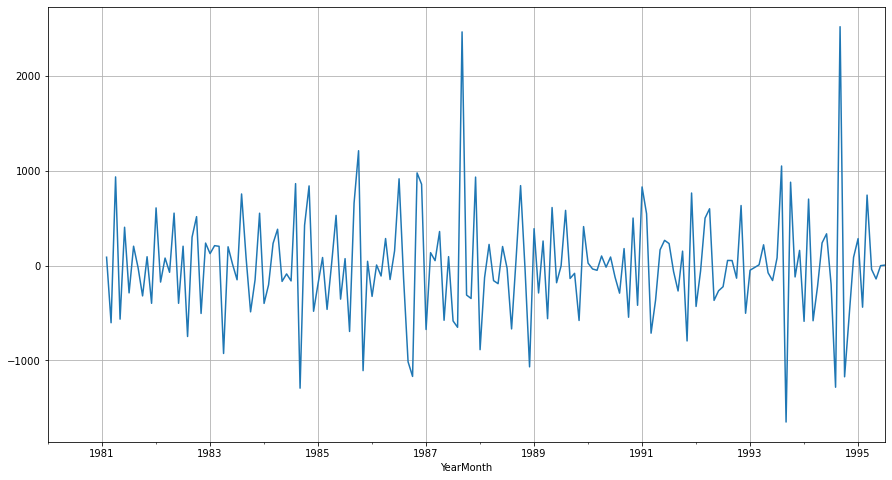

In [149]:
(sp['Sparkling'].diff(12)).diff().plot()
plt.grid();

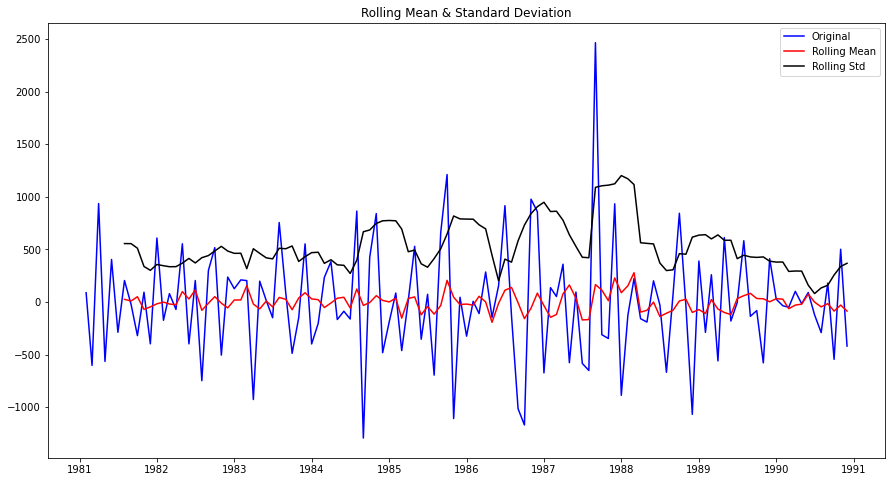

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [150]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

# Seasonality differenced Auto SARIMA

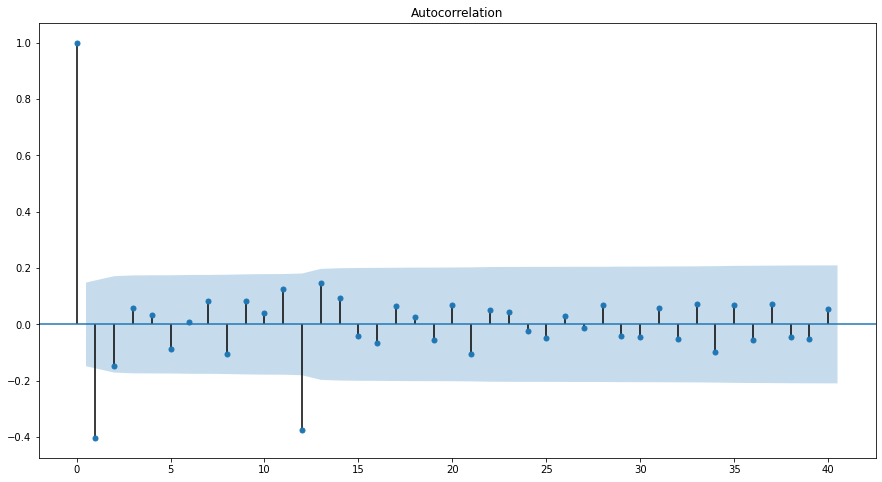

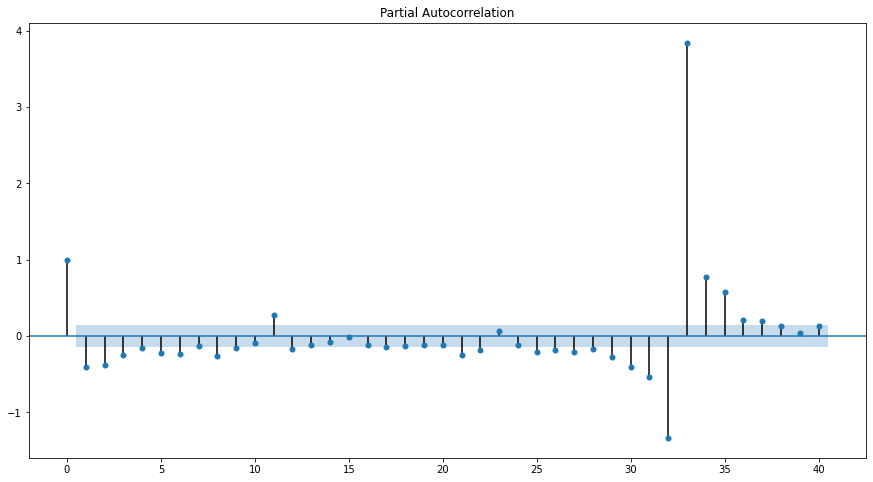

In [151]:
plot_acf((sp['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=40)
plot_pacf((sp['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=40);

In [152]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)


In [153]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [154]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678513
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574253984
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.324390819388
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307638
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866583
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.991155367779
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094365
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380270985
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828404
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229947
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680124
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.859481902388
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.855025919608
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524136763
SARIMA(0, 1, 1)

In [155]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
129  (3, 1, 1)  (3, 1, 0, 12)  1215.898777
141  (3, 1, 2)  (3, 1, 0, 12)  1216.859179
130  (3, 1, 1)  (3, 1, 1, 12)  1217.713895
131  (3, 1, 1)  (3, 1, 2, 12)  1218.416044
142  (3, 1, 2)  (3, 1, 1, 12)  1218.991384

In [156]:
import statsmodels.api as sm

auto_SARIMA_13 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_13 = auto_SARIMA_13.fit(maxiter=1000)
print(results_auto_SARIMA_13.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 0, 12)   Log Likelihood                -599.949
Date:                            Wed, 09 Dec 2020   AIC                           1215.899
Time:                                    23:21:13   BIC                           1234.955
Sample:                                         0   HQIC                          1223.539
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2100      0.156      1.350      0.177      -0.095       0.515
ar.L2         -0.0850      0.149   

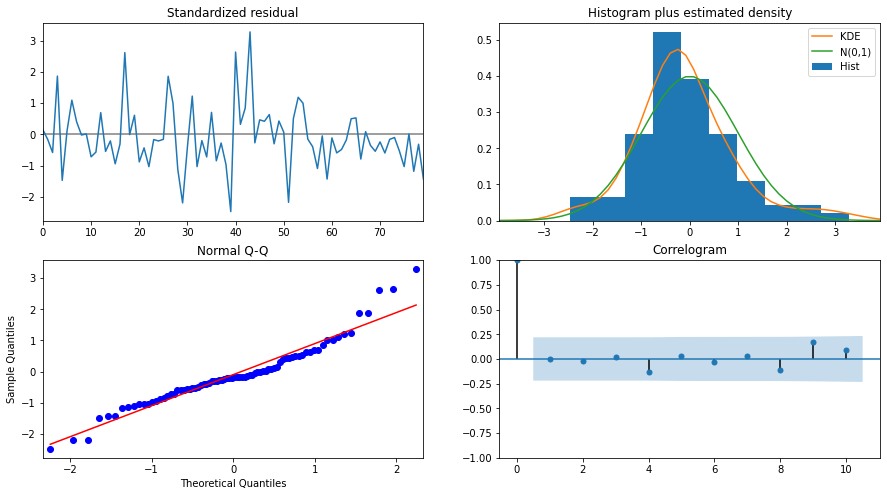

In [157]:
results_auto_SARIMA_13.plot_diagnostics()
plt.show()

In [158]:
predicted_auto_SARIMA_14 = results_auto_SARIMA_13.get_forecast(steps=len(test))

In [159]:
predicted_auto_SARIMA_14.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.737557  436.009147     689.175332    2398.299782
1  1383.494571  449.437454     502.613348    2264.375795
2  1825.064356  449.448292     944.161891    2705.966822
3  1705.459882  451.187703     821.148234    2589.771530
4  1601.808659  452.405128     715.110902    2488.506416

In [160]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_14.predicted_mean,squared=False)
print(rmse)

332.68120226228916


In [161]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(3,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)                  1374.521232
Manual_ARIMA(3,1,2)                1378.975599
Auto_SARIMA_WOSD(3,1,1)(3,0,0,12)   601.245088
SARIMA(3,1,1)(3,1,0,12)             332.681202

In [162]:
predicted_auto_SARIMA_15 = results_auto_SARIMA_13.get_forecast(steps=12)

In [163]:
pred_full_auto_SARIMA_date = predicted_auto_SARIMA_15.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

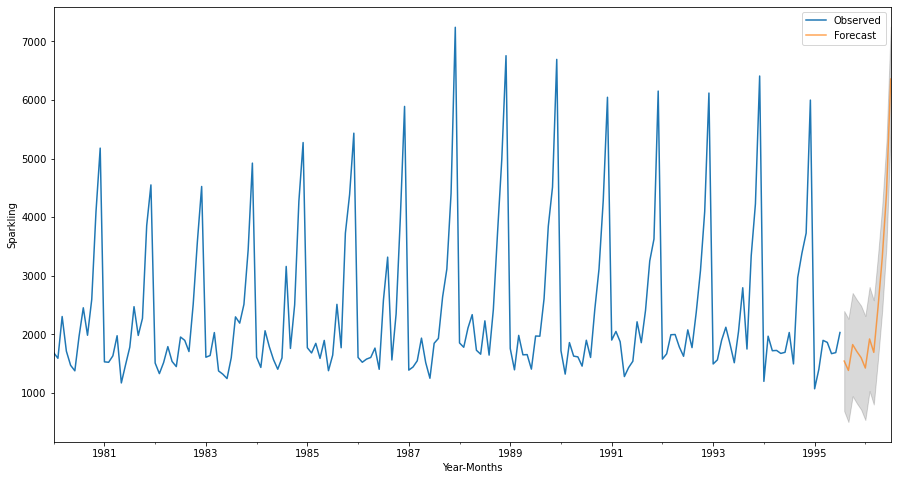

In [164]:
# plot the forecast along with the confidence band

axis = sp['Sparkling'].plot(label='Observed')
pred_full_auto_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_auto_SARIMA_date.index, pred_full_auto_SARIMA_date['mean_ci_lower'], 
                  pred_full_auto_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

# Manual SARIMA

In [165]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -772.847
Date:                            Wed, 09 Dec 2020   AIC                           1559.693
Time:                                    23:21:18   BIC                           1578.204
Sample:                                         0   HQIC                          1567.192
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.125      1.425      0.154      -0.067       0.424
ar.L2         -0.0904      0.127   

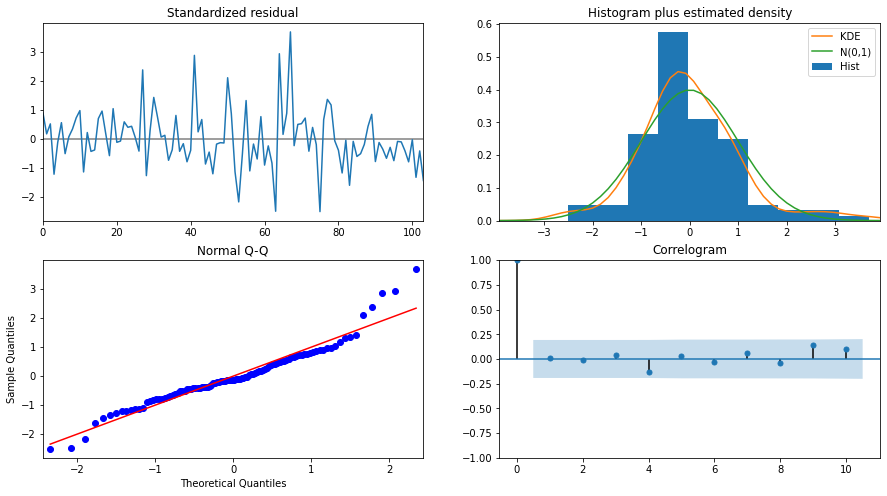

In [166]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [167]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [168]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1510.543537  407.197836     712.450445    2308.636630
1  1304.990076  419.626416     482.537414    2127.442739
2  1769.571078  419.746629     946.882802    2592.259354
3  1596.669522  422.059272     769.448549    2423.890495
4  1520.849462  424.083689     689.660705    2352.038218

In [169]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

412.78113537142116


In [170]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)                  1374.521232
Manual_ARIMA(3,1,2)                1378.975599
Auto_SARIMA_WOSD(3,1,1)(3,0,0,12)   601.245088
SARIMA(3,1,1)(3,1,0,12)             332.681202
SARIMA(3,1,1)(1,1,1,12)             412.781135

In [171]:
full_data_model = sm.tsa.statespace.SARIMAX(sp['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1172.978
Date:                            Wed, 09 Dec 2020   AIC                           2359.956
Time:                                    23:21:26   BIC                           2381.439
Sample:                                01-01-1980   HQIC                          2368.680
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1250      0.082      1.519      0.129      -0.036       0.286
ar.L2         -0.0654      0.099   

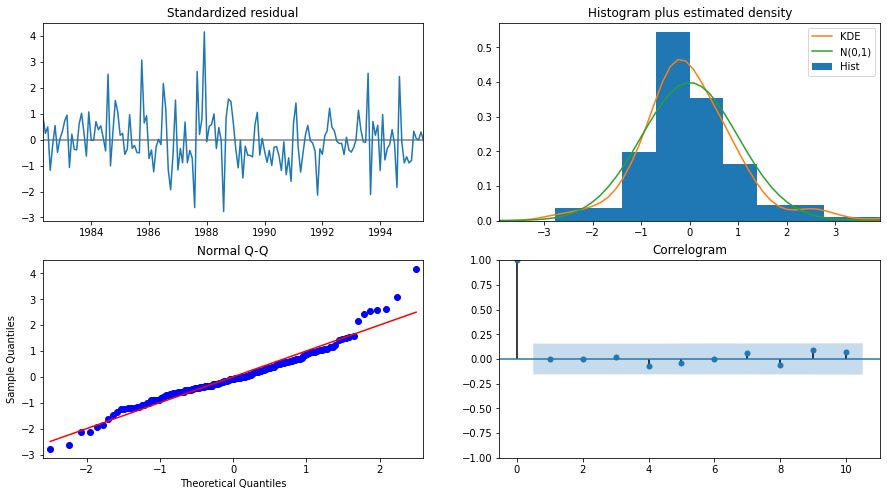

In [172]:
results_full_data_model.plot_diagnostics();

In [173]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [174]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1939.024460  384.483909    1185.449846    2692.599074
1995-09-01  2418.975906  389.440256    1655.687030    3182.264782
1995-10-01  3292.202760  389.456244    2528.882548    4055.522973
1995-11-01  3945.643179  390.260928    3180.745815    4710.540543
1995-12-01  6148.354821  390.760147    5382.479006    6914.230635

In [175]:
rmse = mean_squared_error(sp['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 546.6200190732932


In [176]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

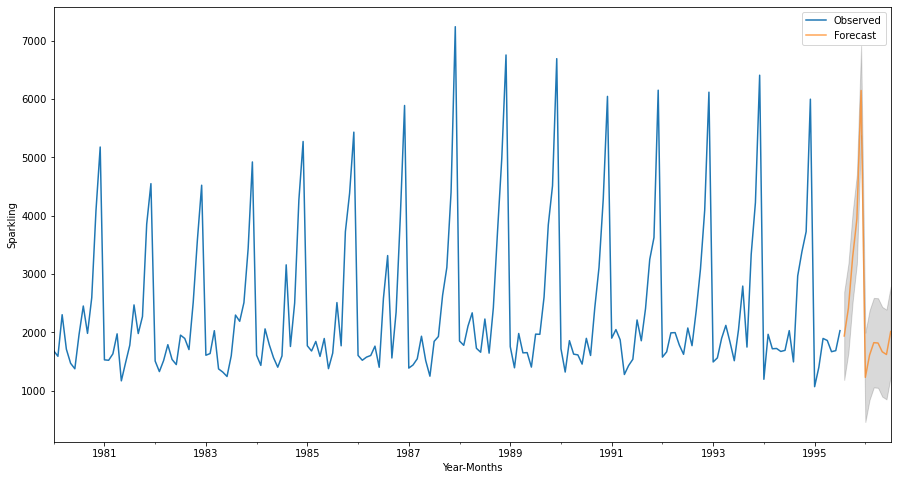

In [177]:
# plot the forecast along with the confidence band

axis = sp['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [178]:
resultsDf

RMSE
Auto_ARIMA(2,1,2)                  1374.521232
Manual_ARIMA(3,1,2)                1378.975599
Auto_SARIMA_WOSD(3,1,1)(3,0,0,12)   601.245088
SARIMA(3,1,1)(3,1,0,12)             332.681202
SARIMA(3,1,1)(1,1,1,12)             412.781135

# Rose

In [179]:
rs=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [180]:
rs.head(10)

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
1980-06-01  168.0
1980-07-01  118.0
1980-08-01  129.0
1980-09-01  205.0
1980-10-01  147.0

In [181]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [182]:
rs.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [183]:
rs.isnull().sum()

Rose    2
dtype: int64

In [184]:
rs.shape

(187, 1)

In [185]:
rcParams['figure.figsize'] = 15,8

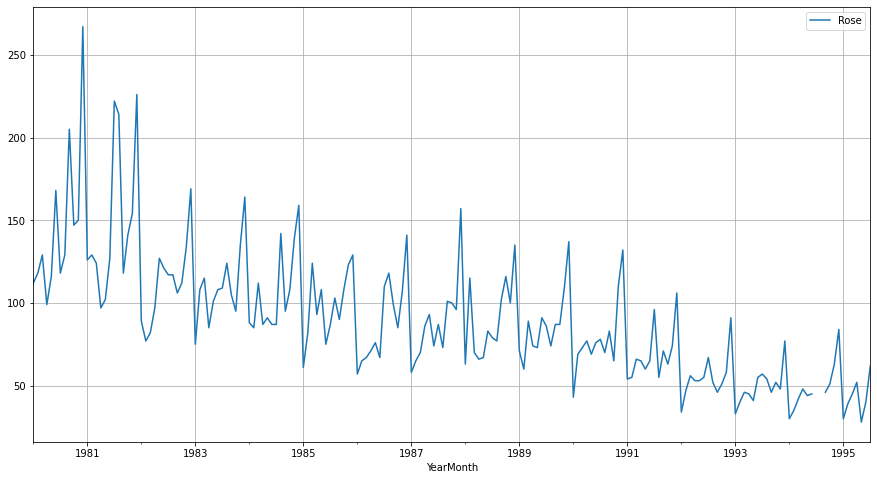

In [186]:
rs.plot(grid=True);

In [187]:
rs['1994']

Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

In [188]:
rs=rs.interpolate(method='spline',order=2)
rs['1994']

Rose
YearMonth           
1994-01-01  30.00000
1994-02-01  35.00000
1994-03-01  42.00000
1994-04-01  48.00000
1994-05-01  44.00000
1994-06-01  45.00000
1994-07-01  45.34978
1994-08-01  44.51237
1994-09-01  46.00000
1994-10-01  51.00000
1994-11-01  63.00000
1994-12-01  84.00000

In [189]:
rs.isnull().sum()

Rose    0
dtype: int64

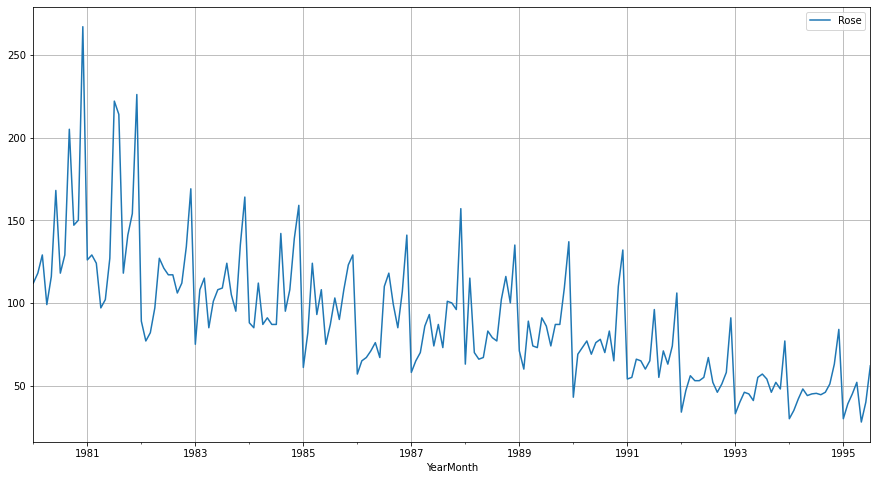

In [190]:
#After interpolation to treat missing values
rs.plot(grid=True);

# Plot a year on year boxplot for Sparkling

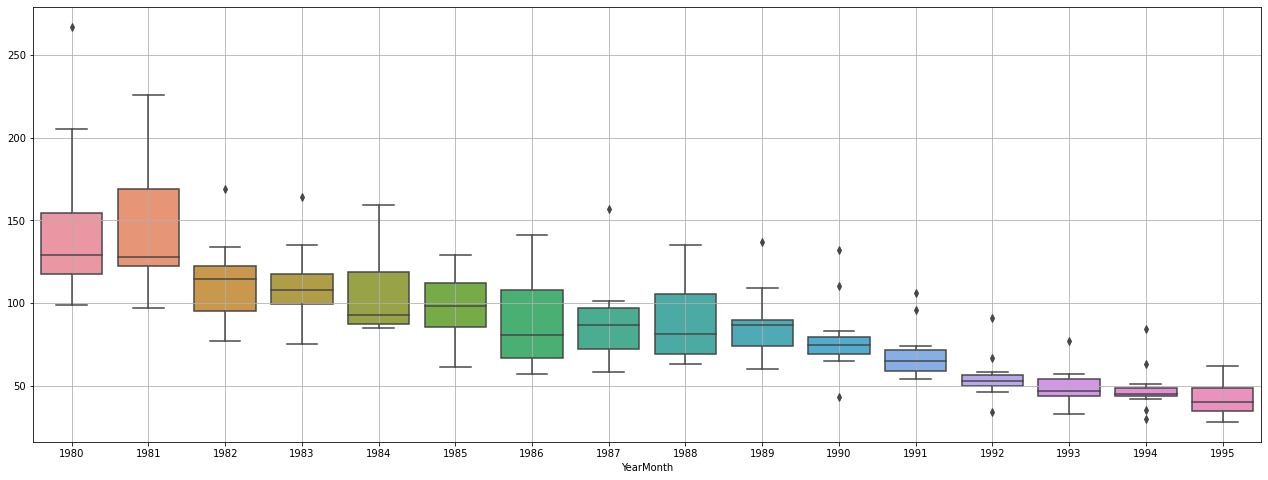

In [191]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rs.index.year,y = rs.values[:,0],ax=ax)
plt.grid();

# Plot a monthly boxplot for Sparkling taking all the years into account

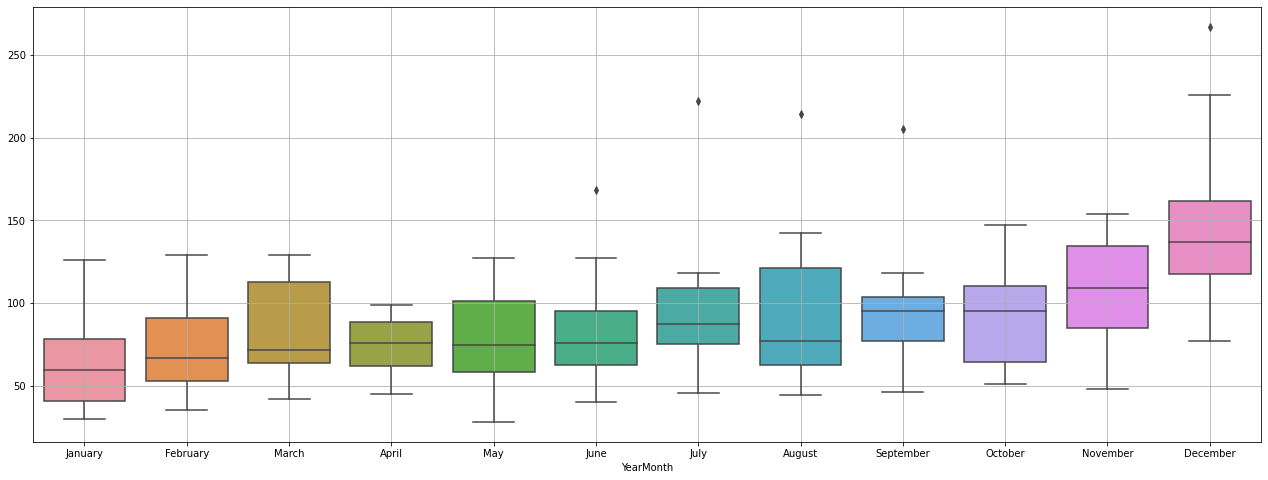

In [192]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rs.index.month_name(),y = rs.values[:,0],ax=ax)
plt.grid();

# Plot a monthplot of the give Time Series

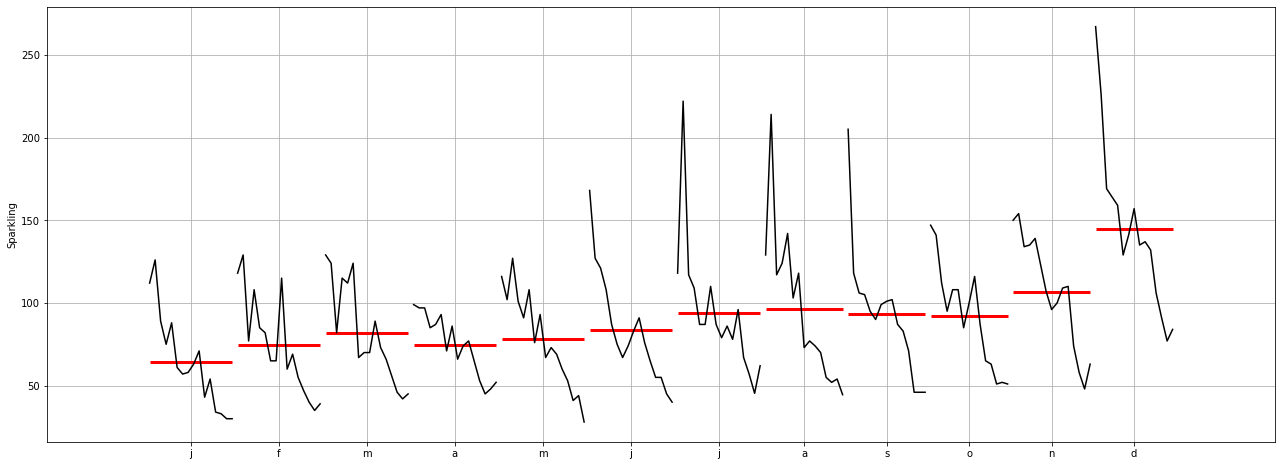

In [193]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(rs,ylabel='Sparkling',ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences

# Yearly Plot

In [194]:
rs_yearly_sum = rs.resample('A').sum()
rs_yearly_sum.head(20)

Rose
YearMonth              
1980-12-31  1758.000000
1981-12-31  1780.000000
1982-12-31  1348.000000
1983-12-31  1324.000000
1984-12-31  1280.000000
1985-12-31  1183.000000
1986-12-31  1063.000000
1987-12-31  1060.000000
1988-12-31  1073.000000
1989-12-31  1038.000000
1990-12-31   945.000000
1991-12-31   830.000000
1992-12-31   663.000000
1993-12-31   594.000000
1994-12-31   577.862151
1995-12-31   296.000000

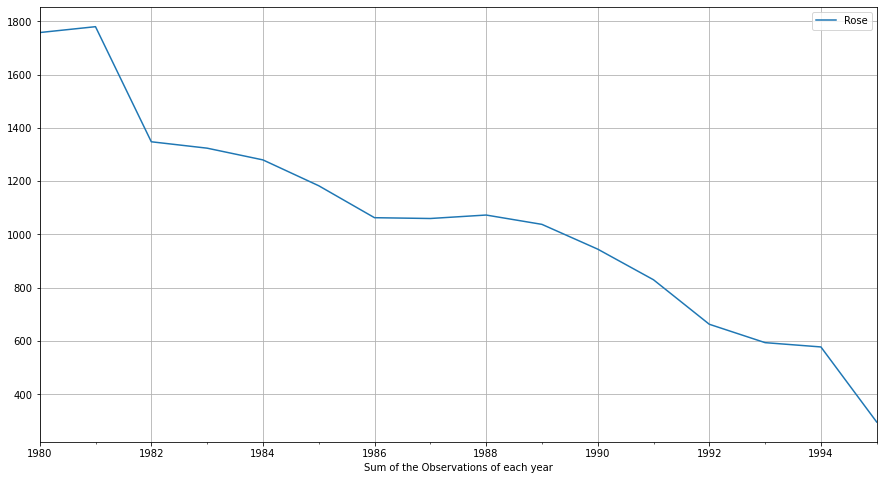

In [195]:
rs_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

# Monthly Plot

In [196]:
rs_monthly_sum = rs.resample('M').sum()
rs_monthly_sum.head(20)

Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
1980-06-30  168.0
1980-07-31  118.0
1980-08-31  129.0
1980-09-30  205.0
1980-10-31  147.0
1980-11-30  150.0
1980-12-31  267.0
1981-01-31  126.0
1981-02-28  129.0
1981-03-31  124.0
1981-04-30   97.0
1981-05-31  102.0
1981-06-30  127.0
1981-07-31  222.0
1981-08-31  214.0

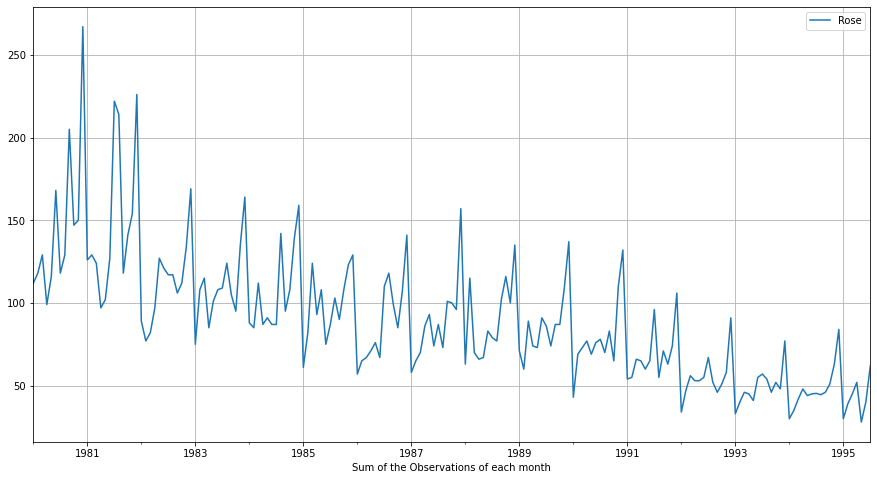

In [197]:
rs_monthly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each month');

# Quarterly Plot

In [198]:
rs_quarterly_sum = rs.resample('Q').sum()
rs_quarterly_sum.head(20)

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0
1981-06-30  326.0
1981-09-30  554.0
1981-12-31  521.0
1982-03-31  248.0
1982-06-30  345.0
1982-09-30  340.0
1982-12-31  415.0
1983-03-31  298.0
1983-06-30  294.0
1983-09-30  338.0
1983-12-31  394.0
1984-03-31  285.0
1984-06-30  265.0
1984-09-30  324.0
1984-12-31  406.0

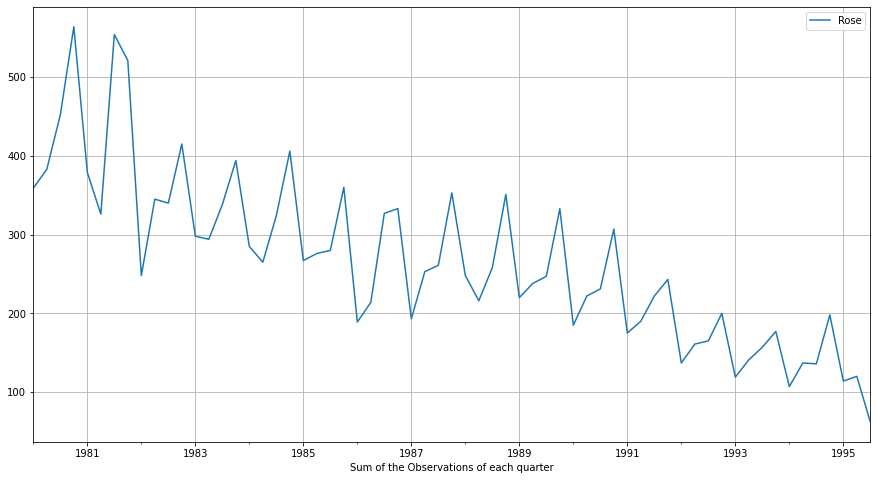

In [199]:
rs_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

# Plot the Time Series according to different months for different years

In [200]:
yearly_sales_across_months = pd.pivot_table(rs, values = 'Rose', columns = rs.index.month, 
                                        index = rs.index.year)

yearly_sales_across_months

YearMonth     1      2      3     4      5      6          7          8   \
YearMonth                                                                  
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.00000  129.00000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.00000  214.00000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.00000  117.00000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.00000  124.00000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.00000  142.00000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.00000  103.00000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.00000  118.00000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.00000   73.00000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.00000   77.00000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.00000   74.00000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.00000   70.00000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.00000   55.00000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.00000   52.00000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.00000   54.00000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.34978   44.51237   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.00000        NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

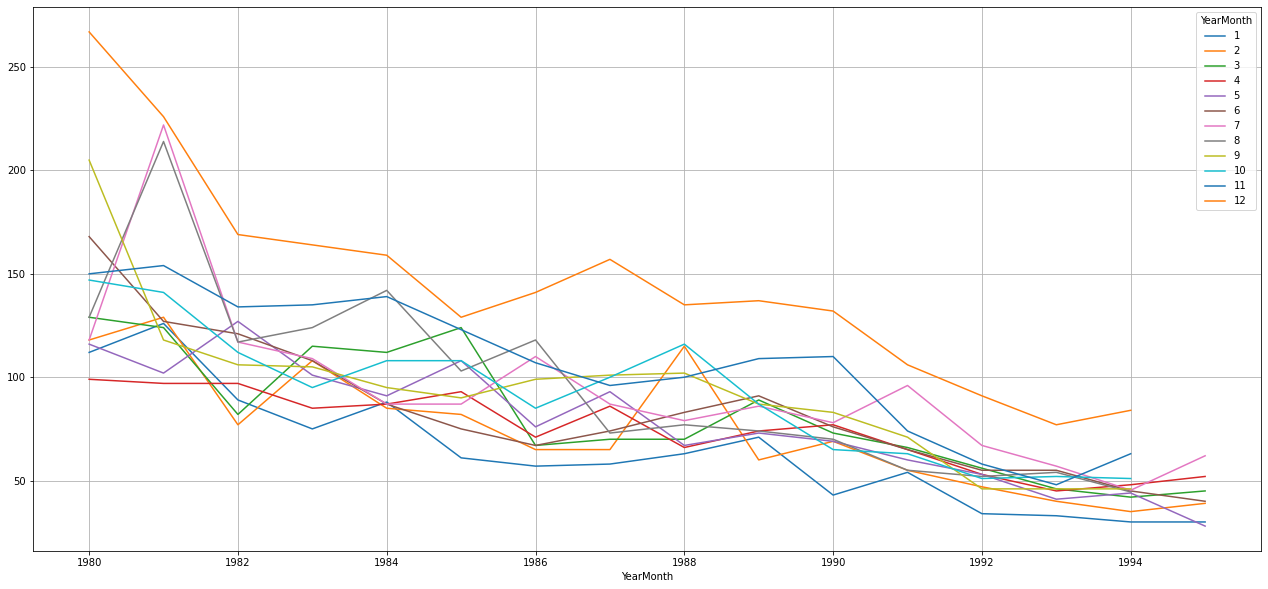

In [201]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Plot the Empirical Cumulative Distribution

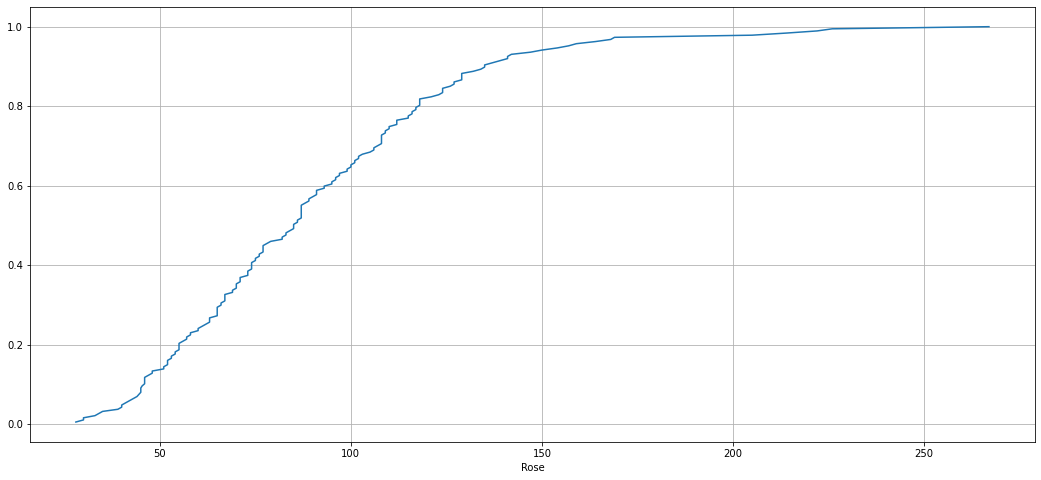

In [202]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rs['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

# Plot the average Rose Sales per month and the month on month percentage change of Rose Sales.

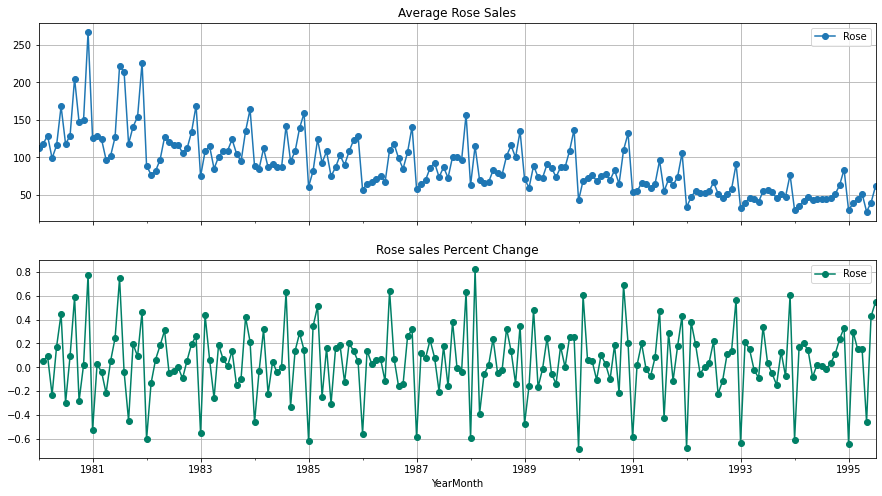

In [203]:
# group by date and get average RetailSales, and precent change
average    = rs.groupby(rs.index)["Rose"].mean()
pct_change =rs.groupby(rs.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose sales Percent Change",grid=True)

#  Decompose the Time Series

## Additive Model

In [204]:
from statsmodels.tsa.seasonal import seasonal_decompose

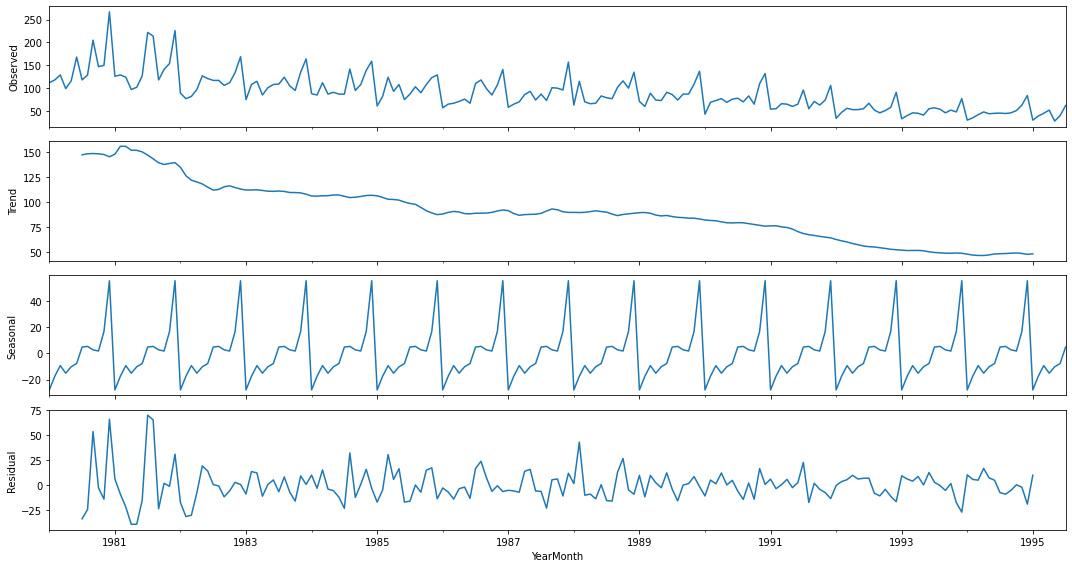

In [205]:
decomposition = seasonal_decompose(rs,model='additive')
decomposition.plot();

In [206]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [207]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
                   Rose
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01  147.083333
1980-08-01  148.125000
1980-09-01  148.375000
1980-10-01  148.083333
1980-11-01  147.416667
1980-12-01  145.125000 

Seasonality 
                  Rose
YearMonth            
1980-01-01 -27.902228
1980-02-01 -17.432196
1980-03-01  -9.278959
1980-04-01 -15.091459
1980-05-01 -10.189673
1980-06-01  -7.671816
1980-07-01   4.904424
1980-08-01   5.429152
1980-09-01   2.781105
1980-10-01   1.878328
1980-11-01  16.853328
1980-12-01  55.719994 

Residual 
                  Rose
YearMonth            
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01 -33.987757
1980-08-01 -24.554152
1980-09-01  53.843895
1980-10-01  -2.961661
1980-11-01 -14.269994
1980-12-01  66.155006 



## Multiplicative Model

In [208]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

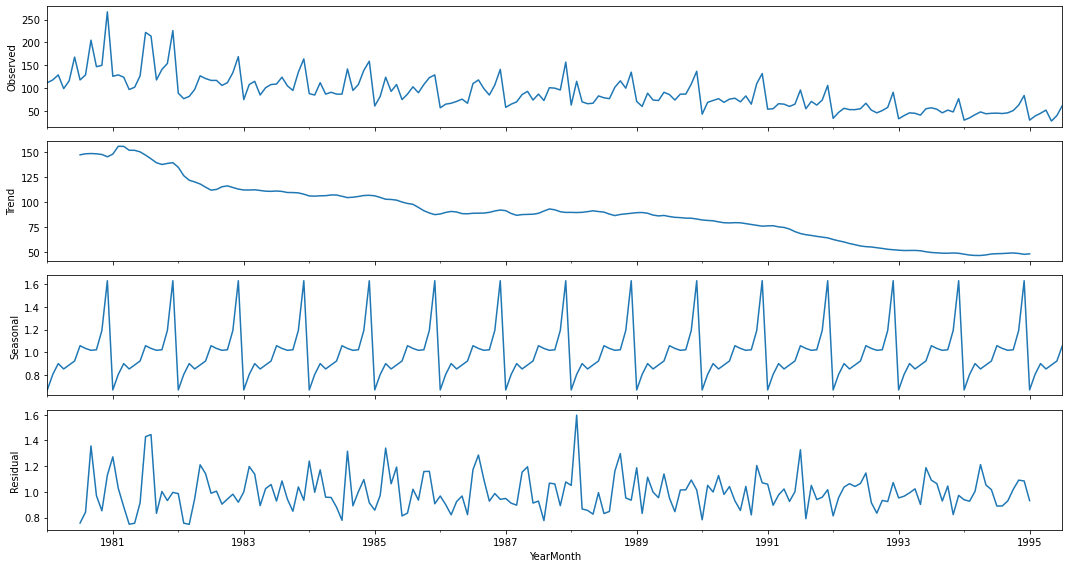

In [209]:
decomposition = seasonal_decompose(rs,model='multiplicative')
decomposition.plot();

In [210]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [211]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
                   Rose
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01  147.083333
1980-08-01  148.125000
1980-09-01  148.375000
1980-10-01  148.083333
1980-11-01  147.416667
1980-12-01  145.125000 

Seasonality 
                 Rose
YearMonth           
1980-01-01  0.670192
1980-02-01  0.806215
1980-03-01  0.901294
1980-04-01  0.854174
1980-05-01  0.889548
1980-06-01  0.924116
1980-07-01  1.058182
1980-08-01  1.034409
1980-09-01  1.017769
1980-10-01  1.022706
1980-11-01  1.192516
1980-12-01  1.628878 

Residual 
                 Rose
YearMonth           
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01  0.758155
1980-08-01  0.841916
1980-09-01  1.357513
1980-10-01  0.970645
1980-11-01  0.853258
1980-12-01  1.129485 



# Train Test Split

In [212]:
train_rs             = rs[rs.index<'1991'] 
test_rs              = rs[rs.index>='1991']

In [213]:
print('First few rows of Training Data')
display(train_rs.head())
print('Last few rows of Training Data')
display(train_rs.tail())
print('First few rows of Test Data')
display(test_rs.head())
print('Last few rows of Test Data')
display(test_rs.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [214]:
print('Shape of Training Data')
display(train.shape)
print('Shape of Test Data')
display(test.shape)

Shape of Training Data


(132, 1)

Shape of Test Data


(55, 1)

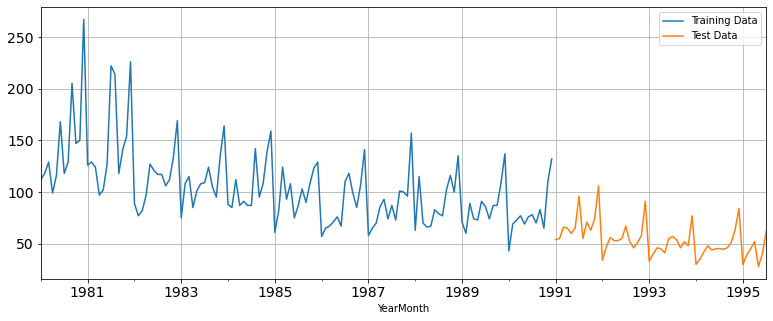

In [215]:
train_rs['Rose'].plot(figsize=(13,5), fontsize=14)
test_rs['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Linear Regression

In [216]:
LinearRegression_train_rs = train_rs.copy()
LinearRegression_test_rs = test_rs.copy()

In [217]:
train_time_rs = [i+1 for i in range(len(train_rs))]
test_time_rs = [i+133 for i in range(len(test_rs))]
print('Training Time instance','\n',train_time_rs)
print('Test Time instance','\n',test_time_rs)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [218]:
LinearRegression_train_rs['time'] = train_time_rs
LinearRegression_test_rs['time'] = test_time_rs

print('First few rows of Training Data','\n',LinearRegression_train_rs.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_rs.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_rs.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_rs.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
lr_rs = LinearRegression()

In [221]:
lr_rs.fit(LinearRegression_train_rs[['time']],LinearRegression_train_rs['Rose'].values)

LinearRegression()

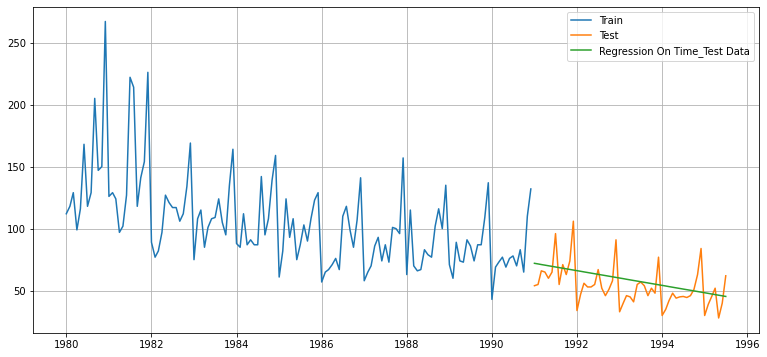

In [222]:
    test_predictions_model1         = lr_rs.predict(LinearRegression_test_rs[['time']])
LinearRegression_test_rs['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rs['Rose'], label='Train')
plt.plot(test_rs['Rose'], label='Test')
plt.plot(LinearRegression_test_rs['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [223]:
from sklearn import metrics

In [224]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_rs['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.277


In [225]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.276693

# Naive

In [226]:
NaiveModel_train = train_rs.copy()
NaiveModel_test = test_rs.copy()

In [227]:
NaiveModel_test['naive'] = np.asarray(train_rs['Rose'])[len(np.asarray(train_rs['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

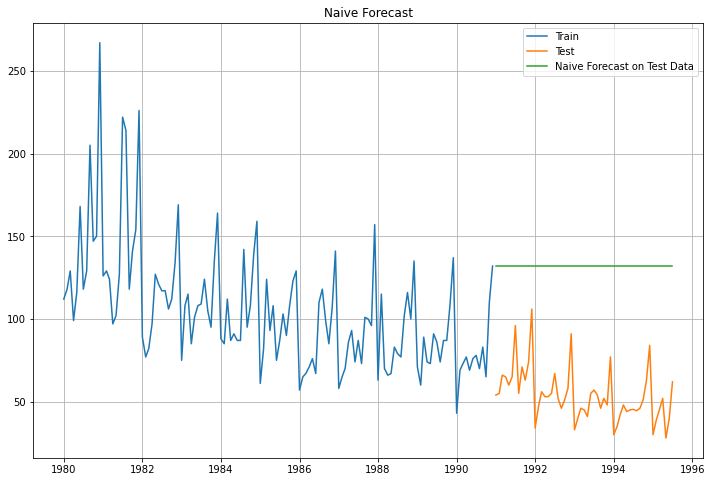

In [228]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test_rs['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [229]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test_rs['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.741


In [230]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.276693
NaiveModel        79.741326

# Simple Average

In [231]:
SimpleAverage_train = train_rs.copy()
SimpleAverage_test = test_rs.copy()

In [232]:
SimpleAverage_test['mean_forecast'] = train_rs['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

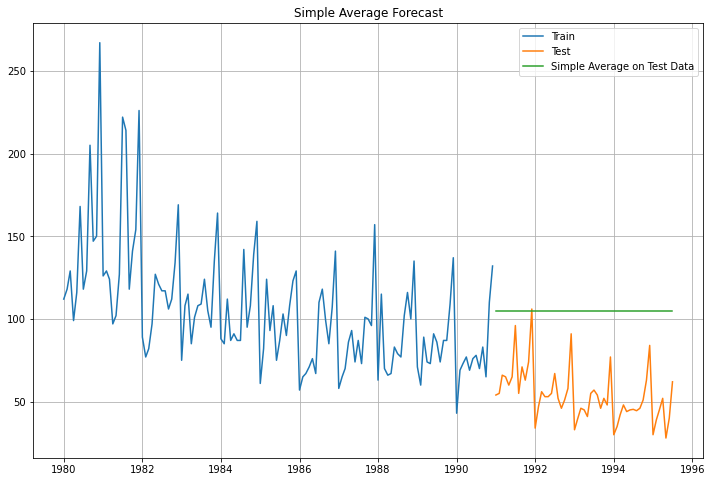

In [233]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [234]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test_rs['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.484


In [235]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.276693
NaiveModel          79.741326
SimpleAverageModel  53.483727

# Moving Average

In [236]:
MovingAverage = rs.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [237]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

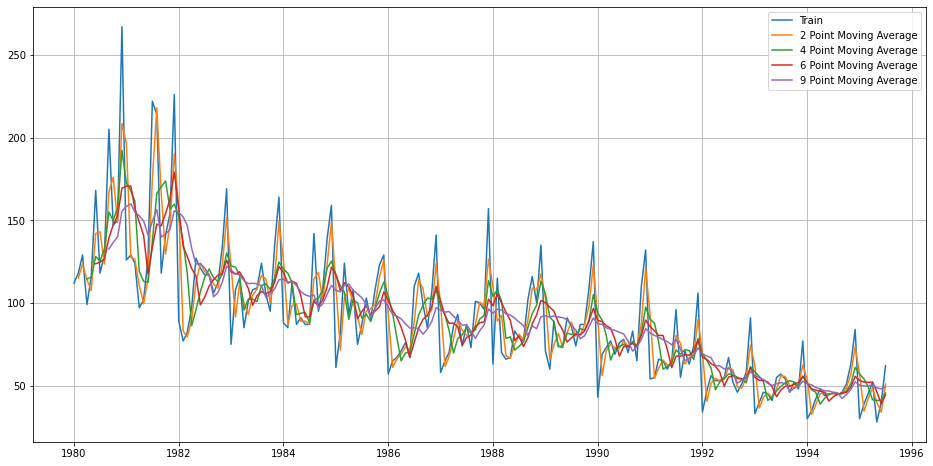

In [238]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [239]:
#Creating train and test set 
train_rs             = rs[rs.index<'1991'] 
test_rs              = rs[rs.index>='1991']

trailing_MovingAverage_train=MovingAverage[rs.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[rs.index>='1991']
# trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
# trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

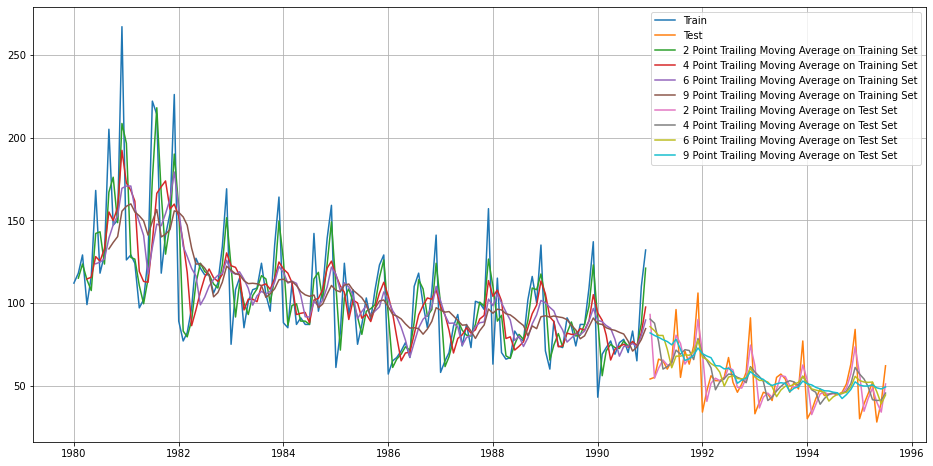

In [240]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [241]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_rs['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_rs['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_rs['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_rs['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.457
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.732 


In [242]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.276693
NaiveModel                   79.741326
SimpleAverageModel           53.483727
2pointTrailingMovingAverage  11.529811
4pointTrailingMovingAverage  14.457115
6pointTrailingMovingAverage  14.571789
9pointTrailingMovingAverage  14.731914

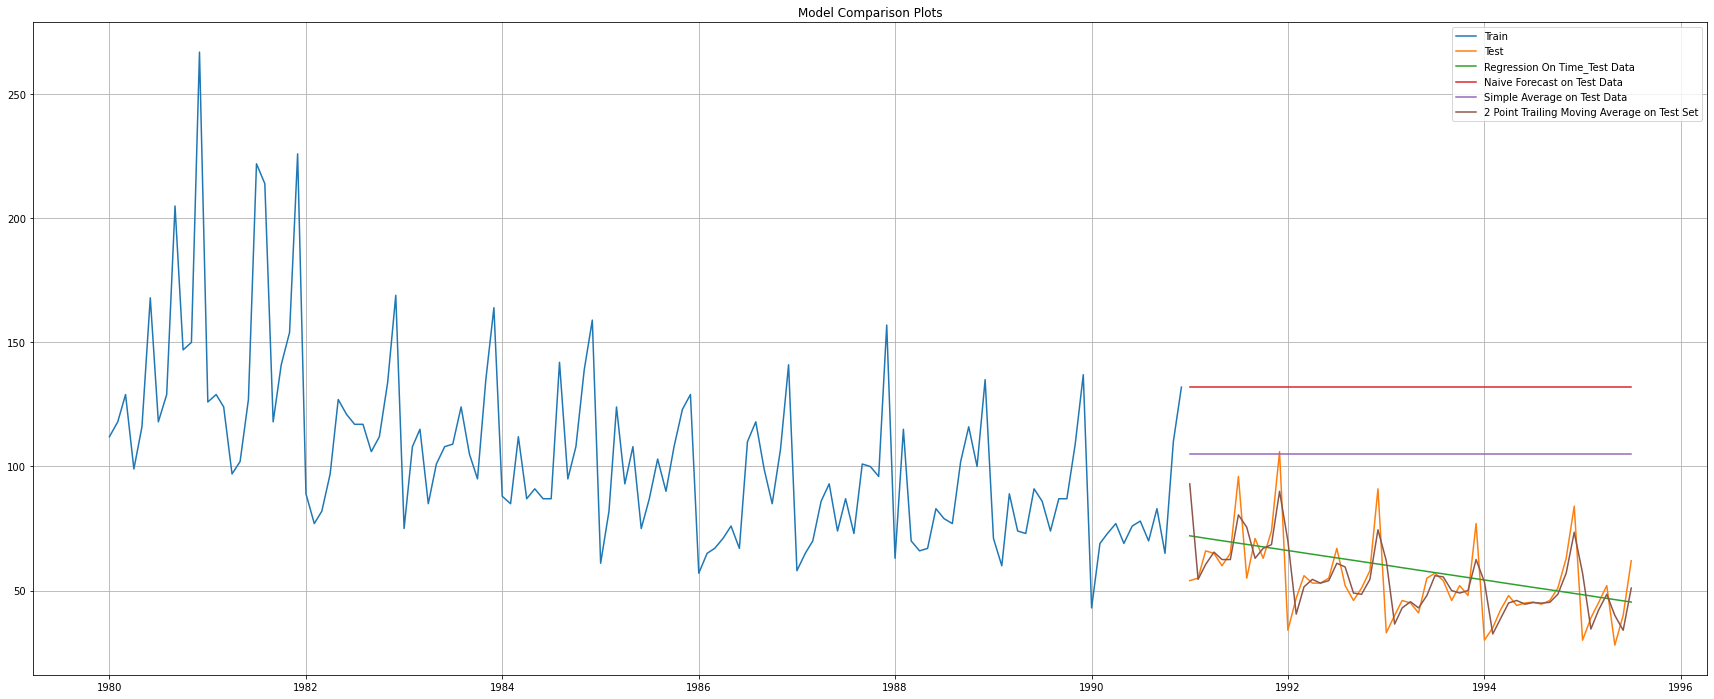

In [243]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train_rs['Rose'], label='Train')
plt.plot(test_rs['Rose'], label='Test')

plt.plot(LinearRegression_test_rs['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Simple Exponential Smoothing

In [244]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [245]:
SES_train = train_rs.copy()
SES_test = test_rs.copy()

In [246]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [247]:
model_SES_autofit = model_SES.fit(optimized=True)

In [248]:
model_SES_autofit.params

{'smoothing_level': 0.09875003987520162,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [249]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rs))
SES_test

Rose    predict
YearMonth                       
1991-01-01   54.00000  87.105003
1991-02-01   55.00000  87.105003
1991-03-01   66.00000  87.105003
1991-04-01   65.00000  87.105003
1991-05-01   60.00000  87.105003
1991-06-01   65.00000  87.105003
1991-07-01   96.00000  87.105003
1991-08-01   55.00000  87.105003
1991-09-01   71.00000  87.105003
1991-10-01   63.00000  87.105003
1991-11-01   74.00000  87.105003
1991-12-01  106.00000  87.105003
1992-01-01   34.00000  87.105003
1992-02-01   47.00000  87.105003
1992-03-01   56.00000  87.105003
1992-04-01   53.00000  87.105003
1992-05-01   53.00000  87.105003
1992-06-01   55.00000  87.105003
1992-07-01   67.00000  87.105003
1992-08-01   52.00000  87.105003
1992-09-01   46.00000  87.105003
1992-10-01   51.00000  87.105003
1992-11-01   58.00000  87.105003
1992-12-01   91.00000  87.105003
1993-01-01   33.00000  87.105003
1993-02-01   40.00000  87.105003
1993-03-01   46.00000  87.105003
1993-04-01   45.00000  87.105003
1993-05-01   41.00000  87.105003
1993-06-01   55.00000  87.105003
1993-07-01   57.00000  87.105003
1993-08-01   54.00000  87.105003
1993-09-01   46.00000  87.105003
1993-10-01   52.00000  87.105003
1993-11-01   48.00000  87.105003
1993-12-01   77.00000  87.105003
1994-01-01   30.00000  87.105003
1994-02-01   35.00000  87.105003
1994-03-01   42.00000  87.105003
1994-04-01   48.00000  87.105003
1994-05-01   44.00000  87.105003
1994-06-01   45.00000  87.105003
1994-07-01   45.34978  87.105003
1994-08-01   44.51237  87.105003
1994-09-01   46.00000  87.105003
1994-10-01   51.00000  87.105003
1994-11-01   63.00000  87.105003
1994-12-01   84.00000  87.105003
1995-01-01   30.00000  87.105003
1995-02-01   39.00000  87.105003
1995-03-01   45.00000  87.105003
1995-04-01   52.00000  87.105003
1995-05-01   28.00000  87.105003
1995-06-01   40.00000  87.105003
1995-07-01   62.00000  87.105003

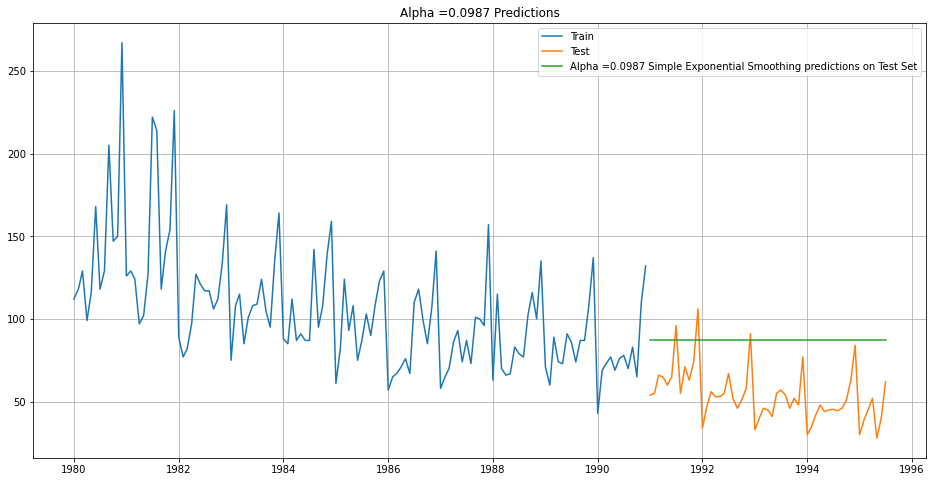

In [250]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [251]:
SES_test.isnull().sum()

Rose       0
predict    0
dtype: int64

In [252]:
SES_test.tail(10)

Rose    predict
YearMonth                  
1994-10-01  51.0  87.105003
1994-11-01  63.0  87.105003
1994-12-01  84.0  87.105003
1995-01-01  30.0  87.105003
1995-02-01  39.0  87.105003
1995-03-01  45.0  87.105003
1995-04-01  52.0  87.105003
1995-05-01  28.0  87.105003
1995-06-01  40.0  87.105003
1995-07-01  62.0  87.105003

In [253]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha 0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha 0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.820


In [254]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         15.276693
NaiveModel                               79.741326
SimpleAverageModel                       53.483727
2pointTrailingMovingAverage              11.529811
4pointTrailingMovingAverage              14.457115
6pointTrailingMovingAverage              14.571789
9pointTrailingMovingAverage              14.731914
Alpha=0.0987,SimpleExponentialSmoothing  36.819863

In [255]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [256]:
SES_test.isnull().sum()

Rose       0
predict    0
dtype: int64

In [257]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [258]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.851649
1           0.2   31.979391  41.385383
2           0.3   32.470164  47.528150
3           0.4   33.035130  53.790554
4           0.5   33.682839  59.664776
5           0.6   34.441171  64.994146
6           0.7   35.323261  69.720914
7           0.8   36.334596  73.796658
8           0.9   37.482782  77.161876

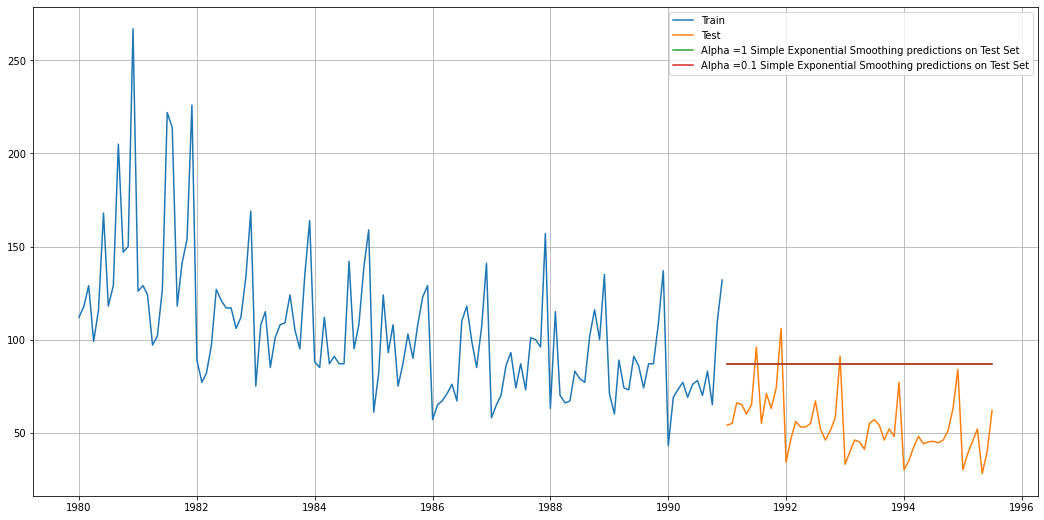

In [259]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [260]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         15.276693
NaiveModel                               79.741326
SimpleAverageModel                       53.483727
2pointTrailingMovingAverage              11.529811
4pointTrailingMovingAverage              14.457115
6pointTrailingMovingAverage              14.571789
9pointTrailingMovingAverage              14.731914
Alpha=0.0987,SimpleExponentialSmoothing  36.819863
Alpha=0.1,SimpleExponentialSmoothing     36.851649

# Double Exponential Smoothing

In [261]:
DES_train = train_rs.copy()
DES_test = test_rs.copy()

In [262]:
model_DES = Holt(DES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [263]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [264]:
model_DES_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [265]:
## Prediction on the test data

DES_test['auto_predict'] = model_DES_autofit.forecast(steps=len(test_rs))
DES_test.tail()

Rose  auto_predict
YearMonth                     
1995-03-01  45.0    145.087450
1995-04-01  52.0    146.251928
1995-05-01  28.0    147.416405
1995-06-01  40.0    148.580883
1995-07-01  62.0    149.745360

In [266]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['auto_predict'],squared=False)
print("For Alpha=0.15789,Beta=0.15789, Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.15789,Beta=0.15789, Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 70.599


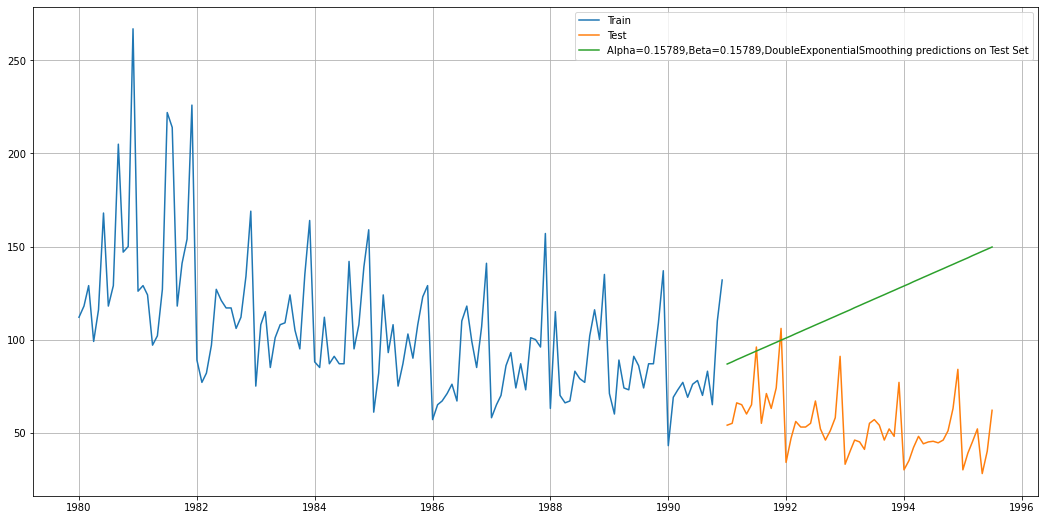

In [267]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['auto_predict'], label='Alpha=0.15789,Beta=0.15789,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [268]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test

Rose  auto_predict     predict
YearMonth                                      
1991-01-01   54.00000     86.863579   86.863579
1991-02-01   55.00000     88.028056   88.028056
1991-03-01   66.00000     89.192534   89.192534
1991-04-01   65.00000     90.357011   90.357011
1991-05-01   60.00000     91.521488   91.521488
1991-06-01   65.00000     92.685966   92.685966
1991-07-01   96.00000     93.850443   93.850443
1991-08-01   55.00000     95.014921   95.014921
1991-09-01   71.00000     96.179398   96.179398
1991-10-01   63.00000     97.343876   97.343876
1991-11-01   74.00000     98.508353   98.508353
1991-12-01  106.00000     99.672831   99.672831
1992-01-01   34.00000    100.837308  100.837308
1992-02-01   47.00000    102.001785  102.001785
1992-03-01   56.00000    103.166263  103.166263
1992-04-01   53.00000    104.330740  104.330740
1992-05-01   53.00000    105.495218  105.495218
1992-06-01   55.00000    106.659695  106.659695
1992-07-01   67.00000    107.824173  107.824173
1992-08-01   52.00000    108.988650  108.988650
1992-09-01   46.00000    110.153127  110.153127
1992-10-01   51.00000    111.317605  111.317605
1992-11-01   58.00000    112.482082  112.482082
1992-12-01   91.00000    113.646560  113.646560
1993-01-01   33.00000    114.811037  114.811037
1993-02-01   40.00000    115.975515  115.975515
1993-03-01   46.00000    117.139992  117.139992
1993-04-01   45.00000    118.304469  118.304469
1993-05-01   41.00000    119.468947  119.468947
1993-06-01   55.00000    120.633424  120.633424
1993-07-01   57.00000    121.797902  121.797902
1993-08-01   54.00000    122.962379  122.962379
1993-09-01   46.00000    124.126857  124.126857
1993-10-01   52.00000    125.291334  125.291334
1993-11-01   48.00000    126.455811  126.455811
1993-12-01   77.00000    127.620289  127.620289
1994-01-01   30.00000    128.784766  128.784766
1994-02-01   35.00000    129.949244  129.949244
1994-03-01   42.00000    131.113721  131.113721
1994-04-01   48.00000    132.278199  132.278199
1994-05-01   44.00000    133.442676  133.442676
1994-06-01   45.00000    134.607153  134.607153
1994-07-01   45.34978    135.771631  135.771631
1994-08-01   44.51237    136.936108  136.936108
1994-09-01   46.00000    138.100586  138.100586
1994-10-01   51.00000    139.265063  139.265063
1994-11-01   63.00000    140.429541  140.429541
1994-12-01   84.00000    141.594018  141.594018
1995-01-01   30.00000    142.758495  142.758495
1995-02-01   39.00000    143.922973  143.922973
1995-03-01   45.00000    145.087450  145.087450
1995-04-01   52.00000    146.251928  146.251928
1995-05-01   28.00000    147.416405  147.416405
1995-06-01   40.00000    148.580883  148.580883
1995-07-01   62.00000    149.745360  149.745360

In [269]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [270]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [271]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.947808
1            0.1          0.2   33.450729   48.715028
2            0.1          0.3   33.145789   78.184134
3            0.1          0.4   33.262191   99.611268
4            0.1          0.5   33.688415  124.297719
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.708212
96           1.0          0.7   54.497039  841.920582
97           1.0          0.8   57.365879  853.993551
98           1.0          0.9   60.474309  834.738942
99           1.0          1.0   63.873454  780.107564

[100 rows x 4 columns]

In [272]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.947808
1            0.1          0.2   33.450729  48.715028
10           0.2          0.1   33.097427  65.758070
2            0.1          0.3   33.145789  78.184134
20           0.3          0.1   33.611269  98.680127

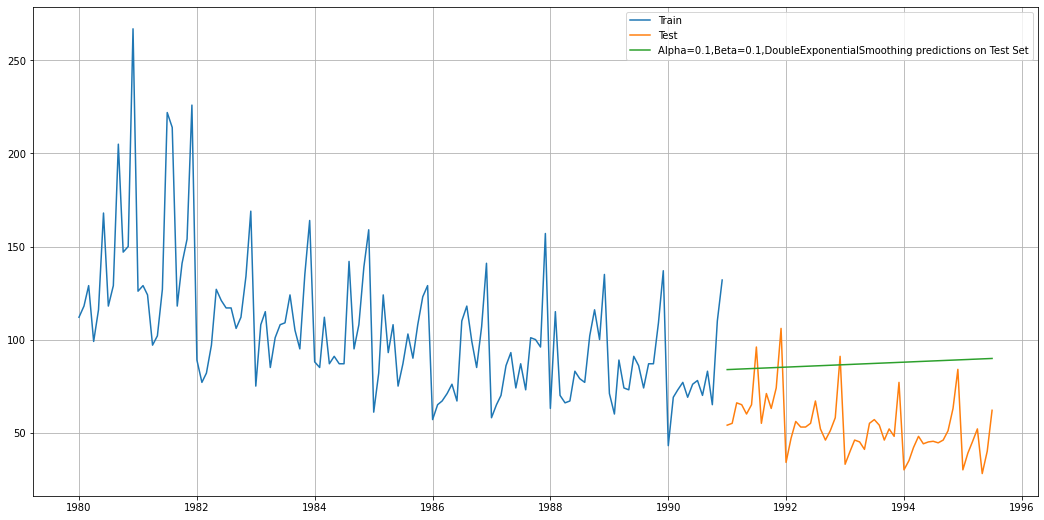

In [273]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [274]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               15.276693
NaiveModel                                     79.741326
SimpleAverageModel                             53.483727
2pointTrailingMovingAverage                    11.529811
4pointTrailingMovingAverage                    14.457115
6pointTrailingMovingAverage                    14.571789
9pointTrailingMovingAverage                    14.731914
Alpha=0.0987,SimpleExponentialSmoothing        36.819863
Alpha=0.1,SimpleExponentialSmoothing           36.851649
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.947808

# Triple Exponential Smoothing

In [275]:
TES_train = train_rs.copy()
TES_test = test_rs.copy()

In [276]:
# model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [277]:
model_TES_autofit = model_TES.fit()

In [278]:
model_TES_autofit.params

{'smoothing_level': 0.1060962026802003,
 'smoothing_slope': 0.04843860441080411,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565282946196,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550327, 1.65927209, 1.8057271 , 1.58888885, 1.77822772,
        1.92604449, 2.1164954 , 2.2513529 , 2.11690676, 2.08112923,
        2.40927387, 3.30448278]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [279]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rs))
TES_test.tail()

Rose  auto_predict
YearMonth                     
1995-03-01  45.0     55.120727
1995-04-01  52.0     48.251073
1995-05-01  28.0     53.720465
1995-06-01  40.0     57.882302
1995-07-01  62.0     63.272056

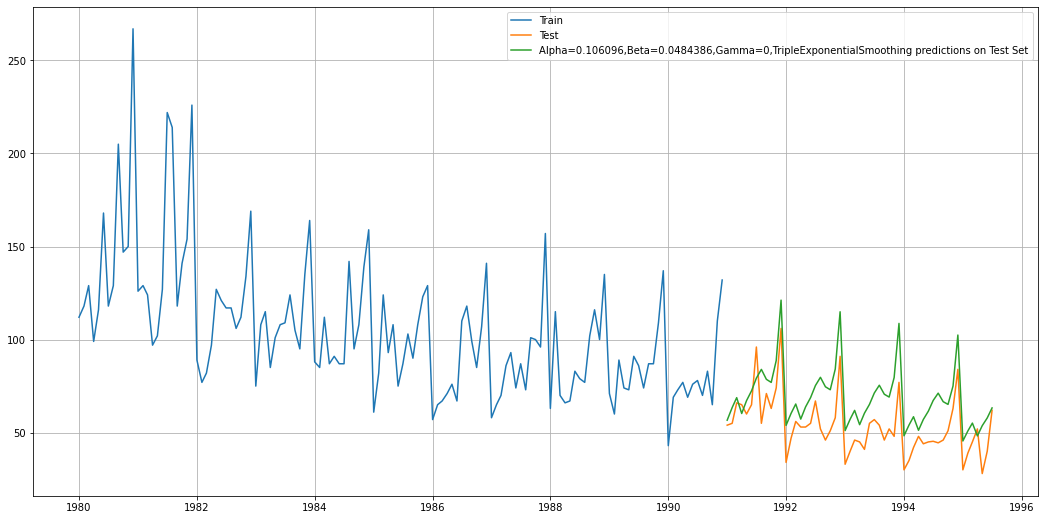

In [280]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.106096,Beta=0.0484386,Gamma=0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [281]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.106096,Beta=0.0484386,Gamma=0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.106096,Beta=0.0484386,Gamma=0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.401


In [282]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.106096,Beta=0.0484386,Gamma=0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.276693
NaiveModel                                          79.741326
SimpleAverageModel                                  53.483727
2pointTrailingMovingAverage                         11.529811
4pointTrailingMovingAverage                         14.457115
6pointTrailingMovingAverage                         14.571789
9pointTrailingMovingAverage                         14.731914
Alpha=0.0987,SimpleExponentialSmoothing             36.819863
Alpha=0.1,SimpleExponentialSmoothing                36.851649
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.947808
Alpha=0.106096,Beta=0.0484386,Gamma=0,TripleExp...  17.400643

In [283]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [284]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [285]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1     25.216699     12.805336
1             0.1          0.1           0.2     24.057626     11.928797
2             0.1          0.1           0.3     23.645037     11.861646
3             0.1          0.1           0.4     23.570939     12.140416
4             0.1          0.1           0.5     23.718878     12.647901
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  28358.458519   9603.643098
996           1.0          1.0           0.7  30724.126331  23029.955482
997           1.0          1.0           0.8   1218.755446   9626.710646
998           1.0          1.0           0.9  14150.253251   9691.904621
999           1.0          1.0           1.0   1768.254189   8138.615769

[1000 rows x 5 columns]

In [286]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
11            0.1          0.2           0.2   24.365597   9.648569
12            0.1          0.2           0.3   23.969166   9.942092
10            0.1          0.2           0.1   25.529854   9.947962
142           0.2          0.5           0.3   27.631767  10.013796
151           0.2          0.6           0.2   28.289836  10.019759

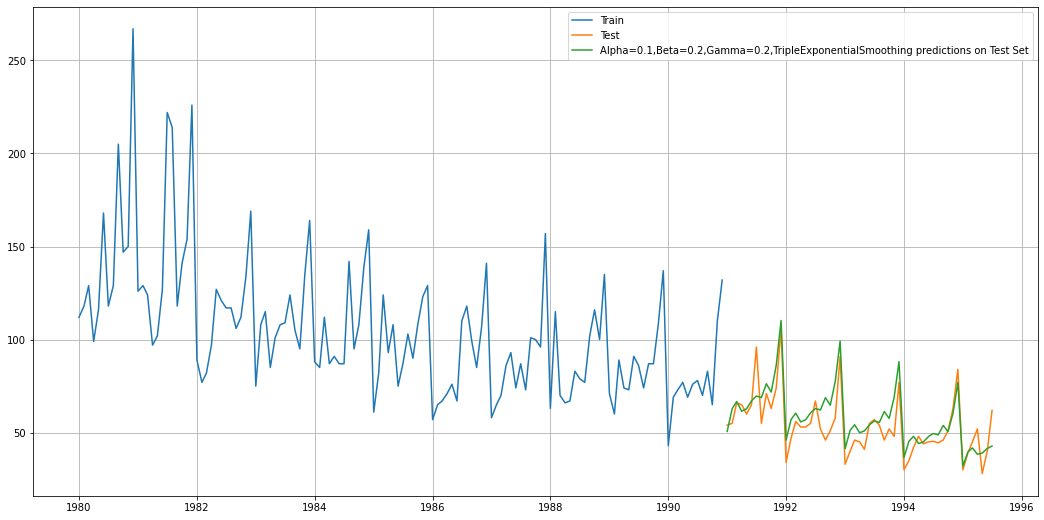

In [287]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [288]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    15.276693
NaiveModel                                          79.741326
SimpleAverageModel                                  53.483727
2pointTrailingMovingAverage                         11.529811
4pointTrailingMovingAverage                         14.457115
6pointTrailingMovingAverage                         14.571789
9pointTrailingMovingAverage                         14.731914
Alpha=0.0987,SimpleExponentialSmoothing             36.819863
Alpha=0.1,SimpleExponentialSmoothing                36.851649
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.947808
Alpha=0.106096,Beta=0.0484386,Gamma=0,TripleExp...  17.400643
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...   9.648569

In [289]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialS...   9.648569
2pointTrailingMovingAverage                         11.529811
4pointTrailingMovingAverage                         14.457115
6pointTrailingMovingAverage                         14.571789
9pointTrailingMovingAverage                         14.731914
RegressionOnTime                                    15.276693
Alpha=0.106096,Beta=0.0484386,Gamma=0,TripleExp...  17.400643
Alpha=0.0987,SimpleExponentialSmoothing             36.819863
Alpha=0.1,SimpleExponentialSmoothing                36.851649
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.947808
SimpleAverageModel                                  53.483727
NaiveModel                                          79.741326

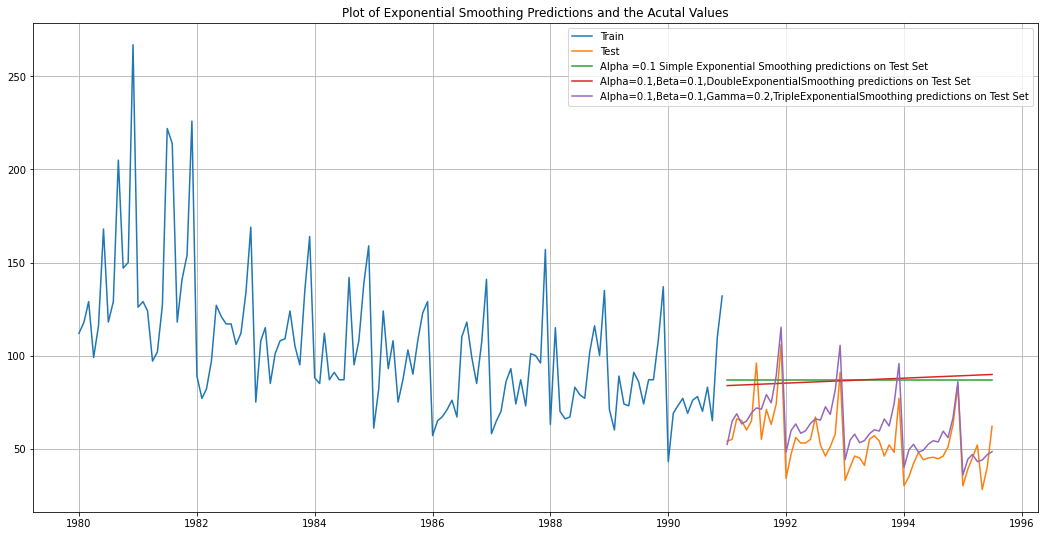

In [290]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train_rs['Rose'], label='Train')
plt.plot(test_rs['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.1, 0.2], label='Alpha=0.1,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [291]:
fullmodel1 = ExponentialSmoothing(rs,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.106096,
                                                                 smoothing_slope=0.0484386,
                                                                 smoothing_seasonal=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [292]:
RMSE_fullmodel1 = metrics.mean_squared_error(rs['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 16.304063425955697


In [293]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test_rs))

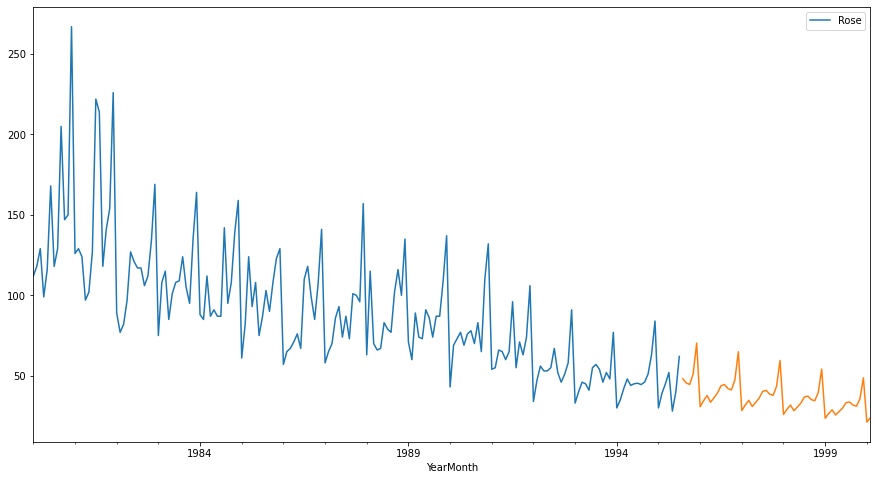

In [294]:
rs.plot()
prediction_1.plot();

In [295]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_rs = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_rs.head()

lower_CI  prediction    upper_ci
1995-08-01  16.114822   48.152411   80.189999
1995-09-01  13.439845   45.477434   77.515022
1995-10-01  12.531047   44.568635   76.606224
1995-11-01  19.226197   51.263785   83.301374
1995-12-01  38.282367   70.319956  102.357545

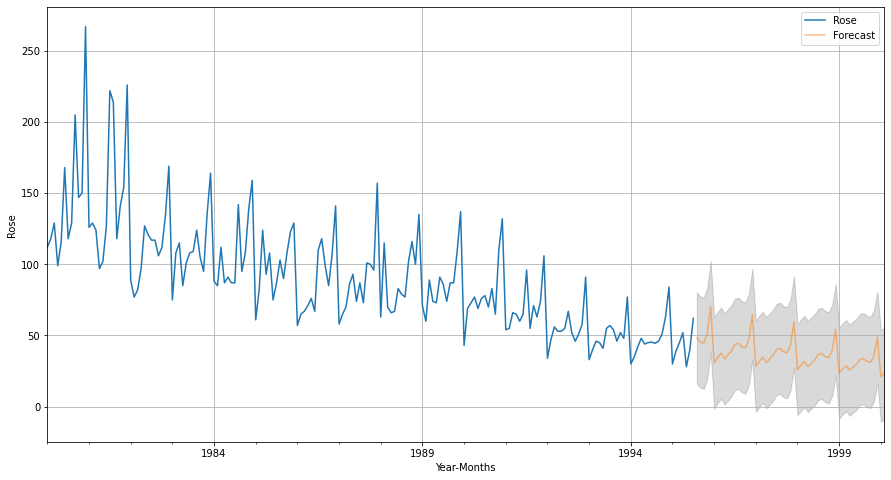

In [296]:
# plot the forecast along with the confidence band

axis = rs.plot(label='Actual', figsize=(15,8))
pred_1_rs['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_rs.index, pred_1_rs['lower_CI'], pred_1_rs['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [297]:
fullmodel2 = ExponentialSmoothing(rs,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.1,
                                                                 smoothing_seasonal=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [298]:
RMSE_fullmodel2 = metrics.mean_squared_error(rs['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 17.20738993965717


In [299]:
# Getting the predictions for 12 months
prediction_2 = fullmodel2.forecast(steps=12)

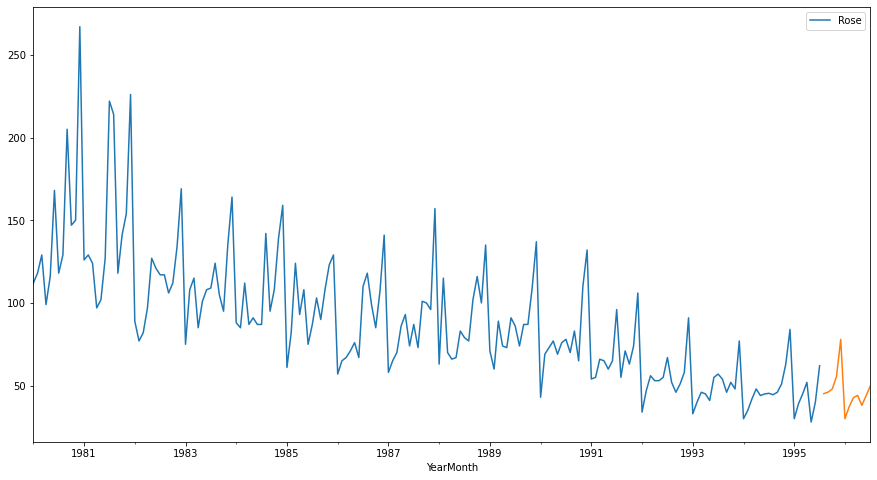

In [300]:
rs.plot()
prediction_2.plot();

In [301]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_2_rs = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_rs.head()

lower_CI  prediction    upper_ci
1995-08-01  14.338651   48.152411   81.966171
1995-09-01  11.663674   45.477434   79.291194
1995-10-01  10.754875   44.568635   78.382395
1995-11-01  17.450026   51.263785   85.077545
1995-12-01  36.506196   70.319956  104.133716

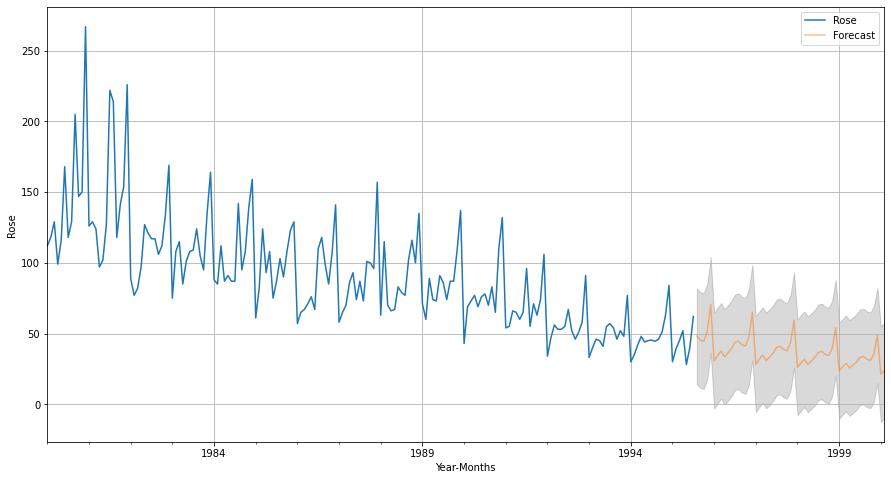

In [302]:
# plot the forecast along with the confidence band

axis = rs.plot(label='Actual', figsize=(15,8))
pred_2_rs['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_rs.index, pred_2_rs['lower_CI'], pred_2_rs['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

# Check Stationarity of data

In [303]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

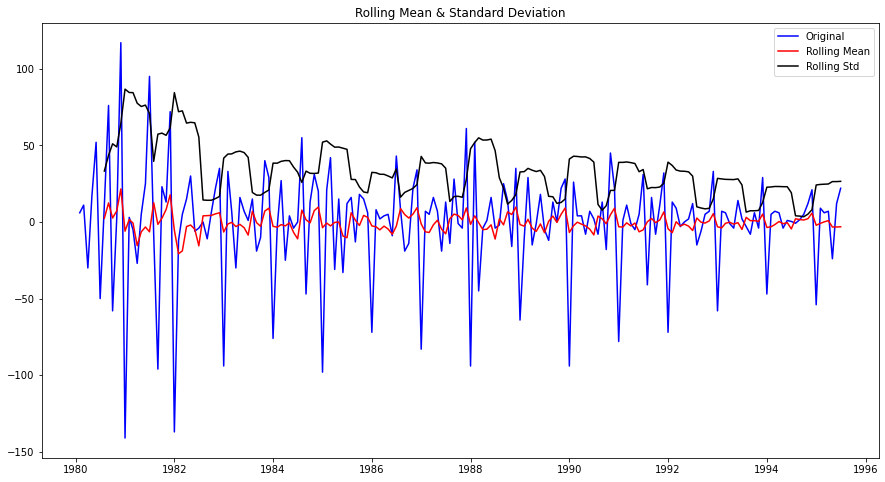

Results of Dickey-Fuller Test:
Test Statistic                -8.044136e+00
p-value                        1.813615e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [304]:
test_stationarity(rs['Rose'].diff().dropna())

In [305]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

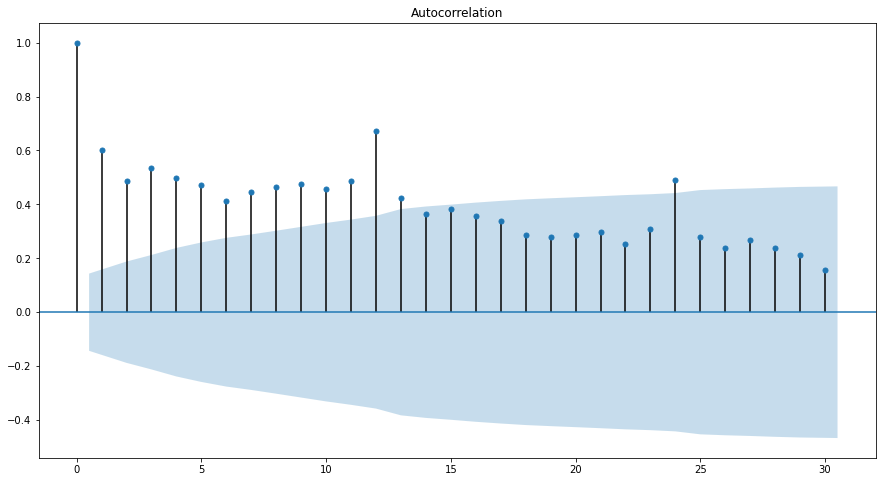

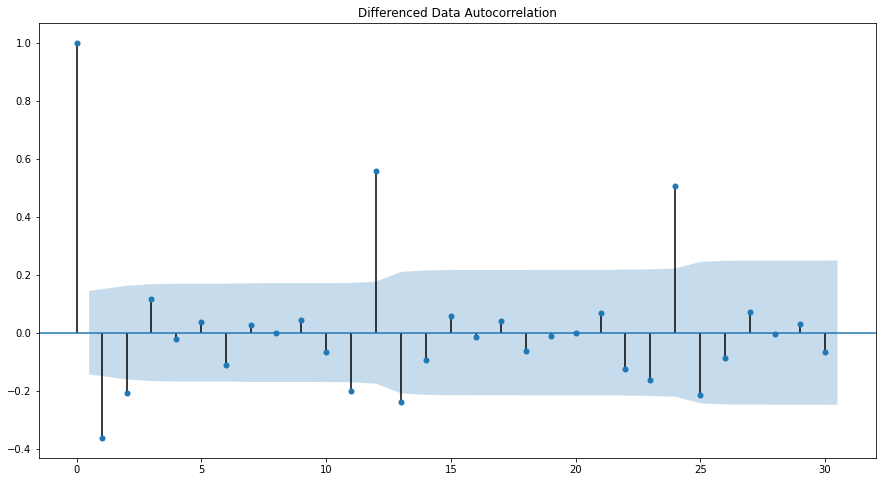

In [306]:
plot_acf(rs['Rose'],lags=30)
plot_acf(rs['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

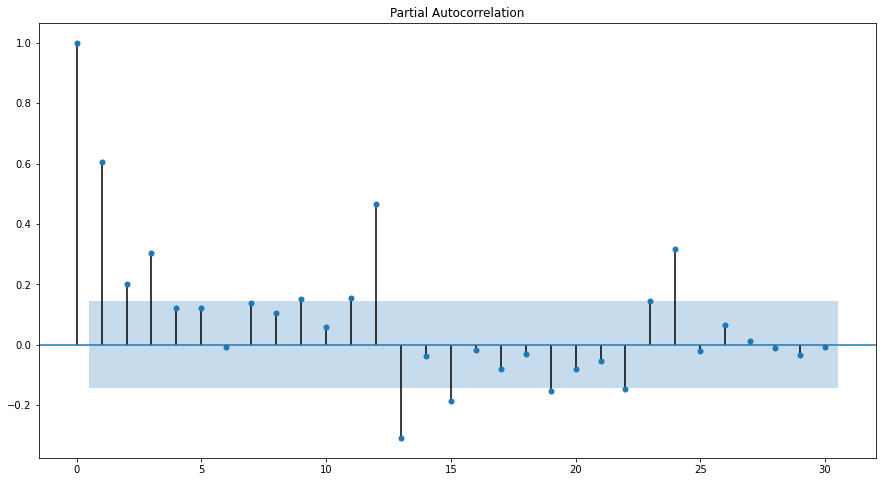

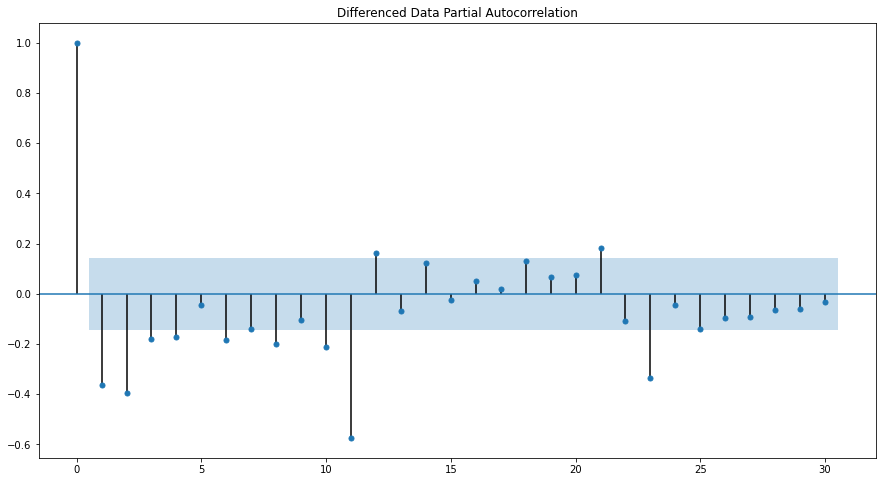

In [307]:
plot_pacf(rs['Rose'],lags=30)
plot_pacf(rs['Rose'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

In [308]:
## This is to display multiple data frames from one cell
from IPython.display import display

# ARIMA

In [309]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)


In [310]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [311]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rs['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464574
ARIMA(0, 1, 2) - AIC:1276.8353792448133
ARIMA(1, 1, 0) - AIC:1319.3483105801893
ARIMA(1, 1, 1) - AIC:1277.7757495782716
ARIMA(1, 1, 2) - AIC:1277.3592235461224
ARIMA(2, 1, 0) - AIC:1300.6092611744157
ARIMA(2, 1, 1) - AIC:1279.0456894093113
ARIMA(2, 1, 2) - AIC:1279.2986939364941
ARIMA(3, 1, 0) - AIC:1299.4787391544312
ARIMA(3, 1, 1) - AIC:1279.6059680049098
ARIMA(3, 1, 2) - AIC:1280.969247428


In [312]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2   (0, 1, 2)  1276.835379
5   (1, 1, 2)  1277.359224
4   (1, 1, 1)  1277.775750
7   (2, 1, 1)  1279.045689
8   (2, 1, 2)  1279.298694
10  (3, 1, 1)  1279.605968
1   (0, 1, 1)  1280.726183
11  (3, 1, 2)  1280.969247
9   (3, 1, 0)  1299.478739
6   (2, 1, 0)  1300.609261
3   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [313]:
auto_ARIMA = ARIMA(train_rs['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 09 Dec 2020   AIC                           1276.835
Time:                        23:22:52   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [314]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rs))

In [315]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_rs['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.627056351048335


In [316]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_ARIMA(0,1,2)'])

resultsDf

RMSE
Auto_ARIMA(0,1,2)  15.627056

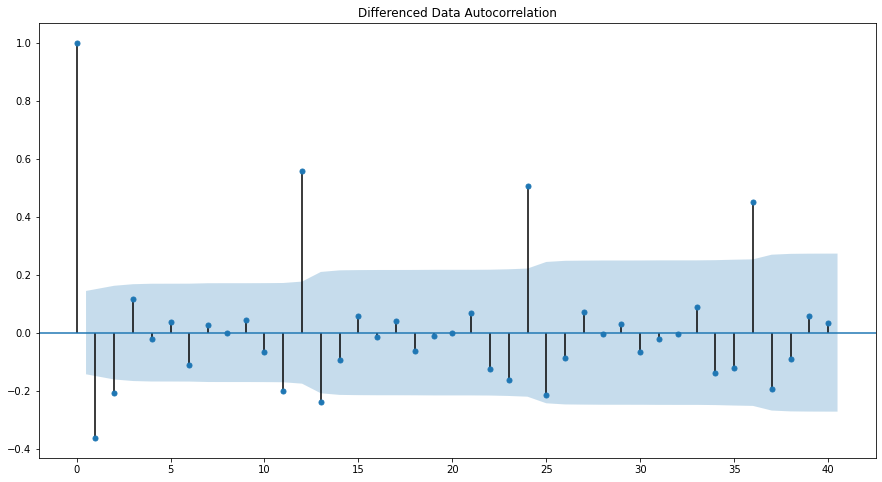

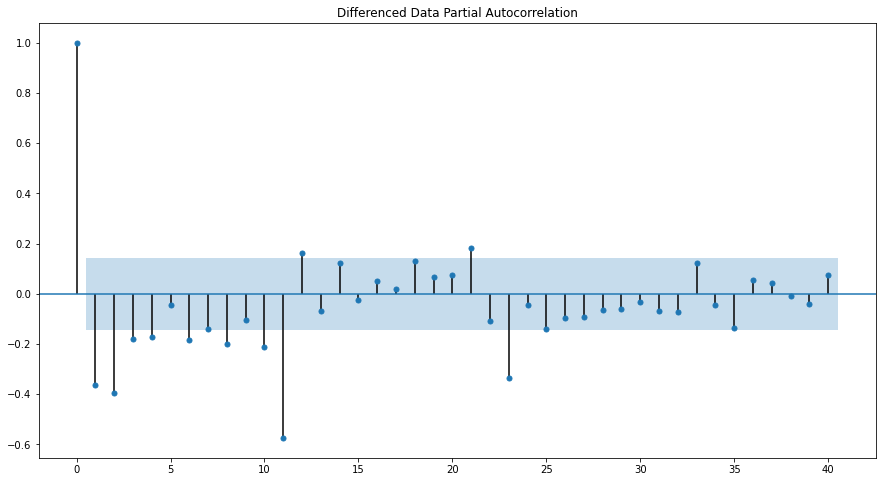

In [317]:
plot_acf(rs['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(rs['Rose'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show()

In [318]:
manual_ARIMA = ARIMA(train_rs['Rose'].astype('float64'), order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.949
Date:                Wed, 09 Dec 2020   AIC                           1280.969
Time:                        23:22:53   BIC                           1301.096
Sample:                    02-01-1980   HQIC                          1289.147
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.655      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.286      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

In [319]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rs))

In [320]:
rmse = mean_squared_error(test_rs['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.529157157277057


In [321]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual_ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(0,1,2)    15.627056
Manual_ARIMA(3,1,2)  15.529157

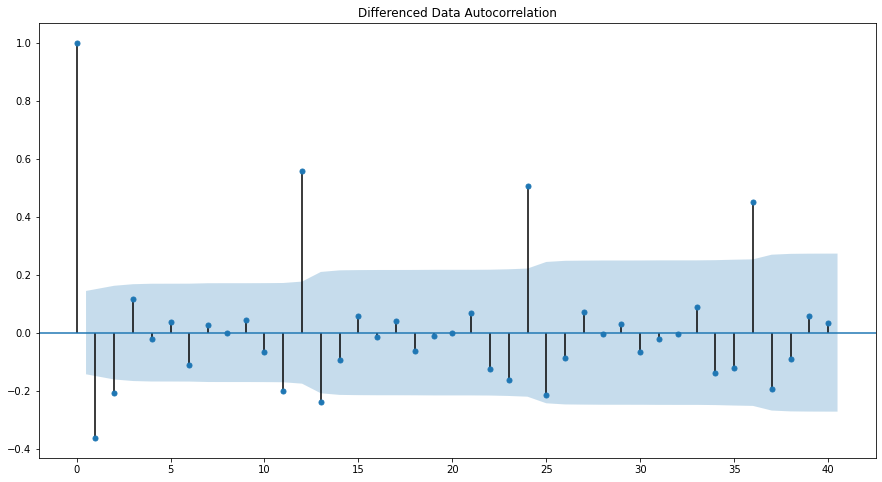

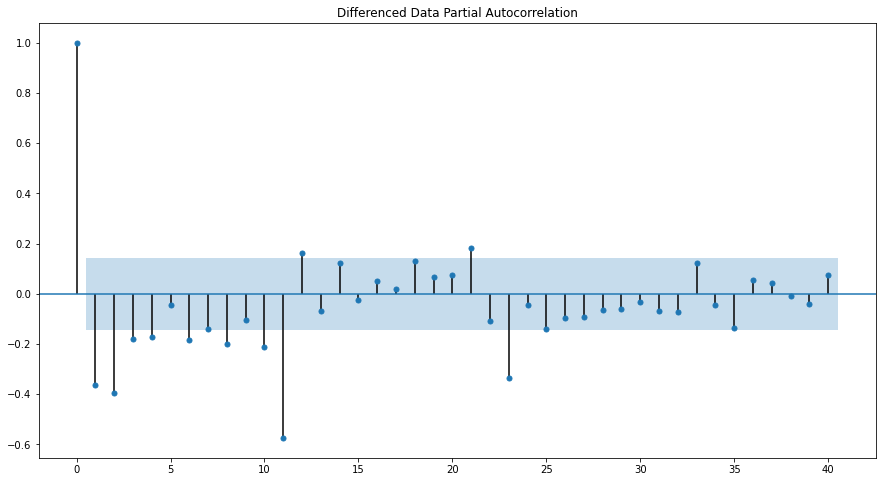

In [322]:
plot_acf(rs['Rose'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(rs['Rose'].diff().dropna(),lags=40,title='Differenced Data Partial Autocorrelation')
plt.show()

# SARIMA

# Without Seasonal Differencing

In [323]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)


In [324]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rs['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207325
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380888
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385474
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753875
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697558
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945677
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702698508
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.530413612895
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918346
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383886
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324917505
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946837
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483312312
SARIMA(0, 1, 1)x(2, 0,

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rs['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

In [ ]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_rs))

In [ ]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_rs['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_SARIMA_WOSD(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

In [ ]:
plot_acf(rs['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(rs['Rose'].diff().dropna(),lags=30,title='Differenced Data Patial Autocorrelation')
plt.show()

In [ ]:
rs.plot()
plt.grid();

In [ ]:
(rs['Rose'].diff(12)).plot()
plt.grid();

In [ ]:
(rs['Rose'].diff(12)).diff().plot()
plt.grid();

In [ ]:
test_stationarity((train_rs['Rose'].diff(12).dropna()).diff(1).dropna())

# Seasonality differenced Auto SARIMA

In [ ]:
plot_acf((rs['Rose'].diff(12).dropna()).diff(1).dropna(),lags=40)
plot_pacf((rs['Rose'].diff(12).dropna()).diff(1).dropna(),lags=40);

In [ ]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rs['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm

auto_SARIMA_13 = sm.tsa.statespace.SARIMAX(train_rs['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_13 = auto_SARIMA_13.fit(maxiter=1000)
print(results_auto_SARIMA_13.summary())

In [ ]:
results_auto_SARIMA_13.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_13 = results_auto_SARIMA_13.get_forecast(steps=len(test_rs))

In [ ]:
predicted_auto_SARIMA_13.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_rs['Rose'],predicted_auto_SARIMA_13.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(3,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

# Manual SARIMA

In [ ]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rs['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

In [ ]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [ ]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test_rs))

In [ ]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_rs['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(rs['Rose'],
                                order=(3,1,2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(rs['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [ ]:
# plot the forecast along with the confidence band

axis = rs['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [ ]:
resultsDf